<a href="https://colab.research.google.com/github/gawronn91/Airbnb/blob/main/Athens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error, mean_absolute_percentage_error, r2_score, mean_poisson_deviance
from sklearn.linear_model import lasso_path
import xgboost
import shap
pd.set_option("display.max_rows", None, "display.max_columns", None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Getting the data

In [ ]:
data = pd.read_csv('http://data.insideairbnb.com/greece/attica/athens/2022-03-24/data/listings.csv.gz')

In [ ]:
# Addition of Apartments.xlsx with list of chosen apartments from Athens
data_apartments = pd.read_csv('/content/drive/MyDrive/Studja - pjatk/ML-Cwiczenia/Airbnb program/My program/Athens/Apartments-Athens - listings.csv', index_col=0)

In [ ]:
data_apartments

listing_url       scrape_id last_scraped  \
id                                                                     
1    https://www.airbnb.com/rooms/15883  20220310203706   2022-03-11   
2    https://www.airbnb.com/rooms/38768  20220310203706   2022-03-11   
3    https://www.airbnb.com/rooms/40625  20220310203706   2022-03-11   
4    https://www.airbnb.com/rooms/51287  20220310203706   2022-03-11   
5    https://www.airbnb.com/rooms/70637  20220310203706   2022-03-11   
6    https://www.airbnb.com/rooms/75471  20220310203706   2022-03-31   
7    https://www.airbnb.com/rooms/75500  20220310203706   2022-03-10   
8    https://www.airbnb.com/rooms/90247  20220310203706   2022-03-11   
9    https://www.airbnb.com/rooms/98210  20220310203706   2022-03-11   
10  https://www.airbnb.com/rooms/109679  20220310203706   2022-03-11   
11  https://www.airbnb.com/rooms/111059  20220310203706   2022-03-10   
12  https://www.airbnb.com/rooms/114505  20220310203706   2022-03-11   
13  https://www.airbnb.com/rooms/114953  20220310203706   2022-03-31   
14  https://www.airbnb.com/rooms/121026  20220310203706   2022-03-11   
15  https://www.airbnb.com/rooms/125683  20220310203706   2022-03-11   
16  https://www.airbnb.com/rooms/131628  20220310203706   2022-03-31   
17  https://www.airbnb.com/rooms/138264  20220310203706   2022-03-10   
18  https://www.airbnb.com/rooms/149759  20220310203706   2022-03-11   
19  https://www.airbnb.com/rooms/153988  20220310203706   2022-03-11   
20  https://www.airbnb.com/rooms/155762  20220310203706   2022-03-11   
21  https://www.airbnb.com/rooms/163792  20220310203706   2022-03-10   
22  https://www.airbnb.com/rooms/169672  20220310203706   2022-03-11   
23  https://www.airbnb.com/rooms/169752  20220310203706   2022-03-11   
24  https://www.airbnb.com/rooms/169852  20220310203706   2022-03-11   
25  https://www.airbnb.com/rooms/197787  20220310203706   2022-03-10   
26  https://www.airbnb.com/rooms/197796  20220310203706   2022-03-10   
27  https://www.airbnb.com/rooms/197809  20220310203706   2022-03-10   
28  https://www.airbnb.com/rooms/197822  20220310203706   2022-03-10   

                                                 name  \
id                                                      
1                           b&b near Old Danube river   
2    central cityapartement- wifi- nice neighbourhood   
3                      Near Palace Schönbrunn, Apt. 1   
4   little studio- next to citycenter- wifi- nice ...   
5                     Flat in the Center with Terrace   
6                     nice big apartment with balcony   
7                  Lovely Viennese apartment (2-4 p.)   
8                     Beautiful New Central Apartment   
9       CIty Center Zimmer mit eigener private Dusche   
10                     Near Palace Schönbrunn, Apt. 4   
11                Modern Apartment, 10min to the City   
12                     Near Palace Schönbrunn, Apt. 5   
13  Modern Apartment, free Parking, flexible check-in   
14                  Feels-Like-Home Apt @ Praterstern   
15                     Cozy studio infront of Prater.   
16                  Holiday Apartment "Modern Vienna"   
17                    Apartment with roofterrace (#1)   
18          Near the Sofitel.10 min from Stephanplatz   
19        City Center Apartment - Free Wifi unlimited   
20  Cosy, urban, perfect location close to city ce...   
21                         Apartment Vienna Simmering   
22                In the Heart of Vienna - Naschmarkt   
23       Naschmarkt mini: modern studio in the center   
24    Naschmarkt classic: spacious flat in the center   
25                   Sunny Apartment Roofterrace (#2)   
26                   Cozy Apartment in the attic (#3)   
27                     Cozy Studio for 2 persons (#4)   
28                  Comfortable Apartement for 2 (#5)   

                                          description  \
id                                                      
1   Four rooms, each one differently and i

In [ ]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10263 entries, 0 to 10262
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10263 non-null  int64  
 1   listing_url                                   10263 non-null  object 
 2   scrape_id                                     10263 non-null  int64  
 3   last_scraped                                  10263 non-null  object 
 4   name                                          10259 non-null  object 
 5   description                                   10174 non-null  object 
 6   neighborhood_overview                         6803 non-null   object 
 7   picture_url                                   10263 non-null  object 
 8   host_id                                       10263 non-null  int64  
 9   host_url                                      10263 non-null 

Columns with missing data

In [ ]:
listings_na = data.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False)

neighbourhood_group_cleansed    10263
calendar_updated                10263
bathrooms                       10263
host_about                       4549
neighbourhood                    3460
neighborhood_overview            3460
host_neighbourhood               3246
review_scores_value              1995
review_scores_location           1994
review_scores_communication      1994
review_scores_checkin            1994
review_scores_cleanliness        1994
review_scores_accuracy           1994
review_scores_rating             1962
last_review                      1962
first_review                     1962
reviews_per_month                1962
host_response_rate               1937
host_response_time               1937
license                          1739
host_acceptance_rate             1442
bedrooms                          868
beds                              147
description                        89
host_location                      21
bathrooms_text                      8
host_identit

Price column

In [ ]:
data.describe(include="all")["price"]

count      10263
unique       346
top       $50.00
freq         449
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

Converting price values from object to float

In [ ]:
data["price"] = data["price"].apply(lambda x: x.replace("$", "")) # Remove dollar sign
data["price"] = data["price"].apply(lambda x: x.replace(",", "")) # Remove thousand seperator
data["price"] = data["price"].astype("float") # Cast the column into type float
data.describe(include="all")["price"]

count     10263.000000
unique             NaN
top                NaN
freq               NaN
mean         82.162136
std         286.820772
min           7.000000
25%          37.000000
50%          50.000000
75%          80.000000
max        8000.000000
Name: price, dtype: float64

In [ ]:
print("99% properties have a price lower than {0: .2f}".format(np.percentile(data.price, 99)))
# Since 99% entries have a price that is lower than 385.8 , we choose to remove the rest as outliers.
# We would like to create a new column "price_range" for visualisations later on. The choice of cutoff points (e.g. 20, 40, 60, etc) is inspired by the quartiles of column "price".

99% properties have a price lower than  385.76


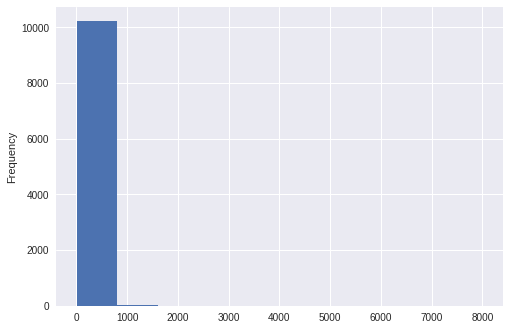

In [ ]:
data.price.plot.hist()
#This data needs to be trimmed due to outliers

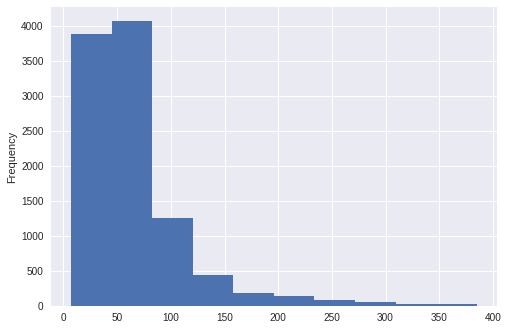

In [ ]:
data = data[(data.price <= np.percentile(data["price"], 99)) & (data.price > 0)] # Exclude outliers
data.price.plot.hist()

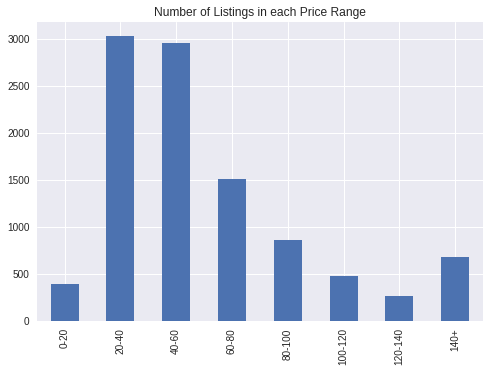

In [ ]:
plt.style.use("seaborn")
price_range = pd.cut(data["price"], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, data["price"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
data["price_range"] = price_range 
data["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

In [ ]:
# Adjusting columns in apartments dataframe
data_apartments["price_range"] = np.zeros(28)

In [ ]:
selected = []
host = ['host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_identity_verified']
location = ['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']
geo = ["latitude", "longitude"]
condition = ['property_type', 'room_type', 'bed_type', 'amenities', 'cleaning_fee', 'minimum_nights']
review = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
size = ['space', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet']
others = ['instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

#Plots about hosts

In [ ]:
data.describe(include="all")[host]

host_is_superhost host_neighbourhood  host_listings_count  \
count              10153               6945         10153.000000   
unique                 2                 68                  NaN   
top                    f              Plaka                  NaN   
freq                6267               1165                  NaN   
mean                 NaN                NaN            18.091993   
std                  NaN                NaN            52.924324   
min                  NaN                NaN             0.000000   
25%                  NaN                NaN             1.000000   
50%                  NaN                NaN             3.000000   
75%                  NaN                NaN            12.000000   
max                  NaN                NaN          2003.000000   

        host_total_listings_count  host_verifications host_identity_verified  
count                10153.000000               10160                  10153  
unique                        NaN                 226                      2  
top                           NaN  ['email', 'phone']                      t  
freq                          NaN                2327                   7593  
mean                    18.091993                 NaN                    NaN  
std                     52.924324                 NaN                    NaN  
min                      0.000000                 NaN                    NaN  
25%                      1.000000                 NaN                    NaN  
50%                      3.000000                 NaN                    NaN  
75%                     12.000000                 NaN                    NaN  
max                   2003.000000                 NaN                    NaN

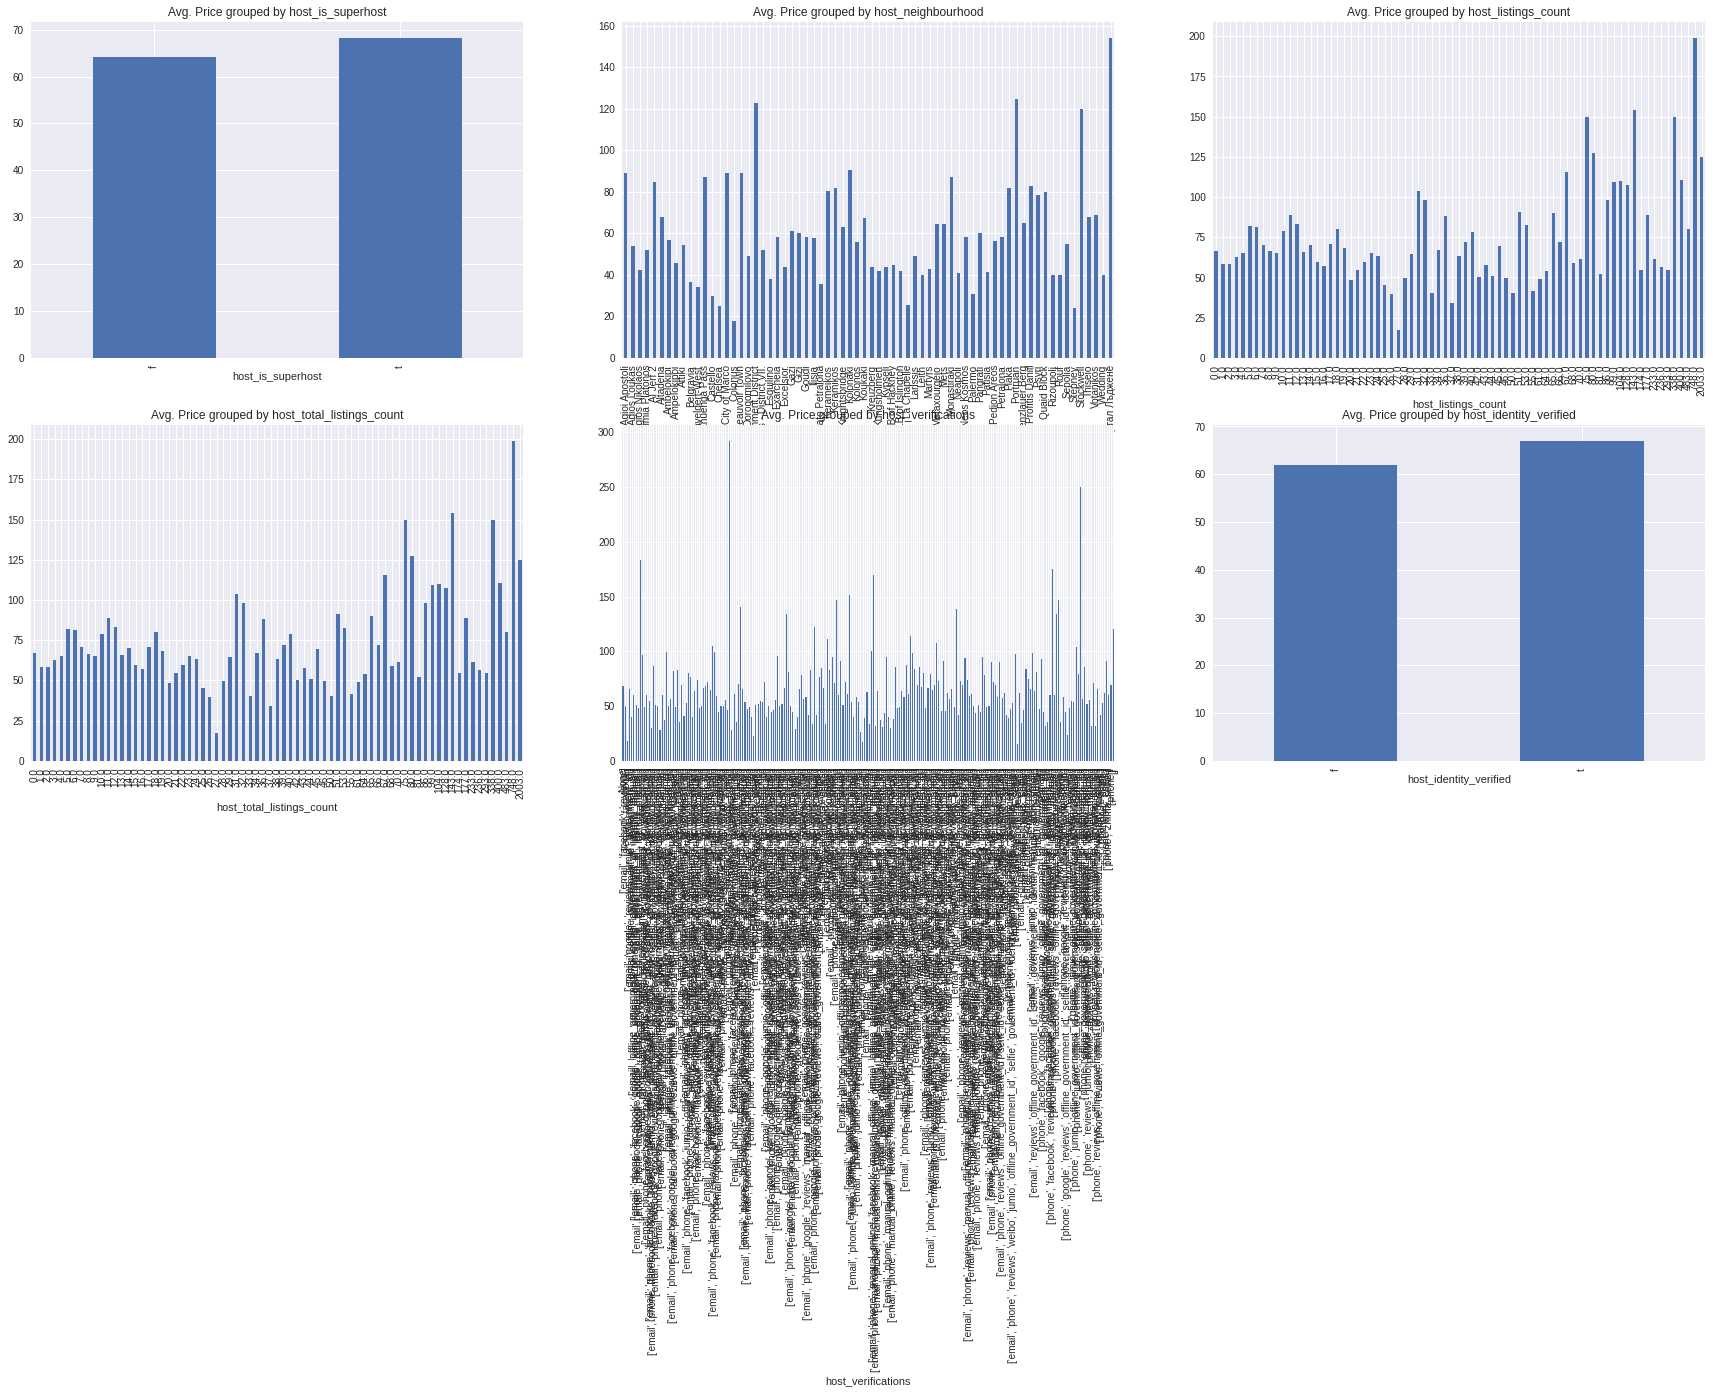

In [ ]:
n_cols = 3
n_rows = np.ceil((len(host)+1)/n_cols)
i = 1
for col in host:
  plt.subplot(n_rows, n_cols, i)
  avg_price_host = data.groupby(col).mean()["price"]
  avg_price_host.plot(kind="bar", figsize=(10*n_cols, 7*n_rows))
  plt.title("Avg. Price grouped by "+col)
  i=i+1

plt.show()

In [ ]:
index = []
i=0
for col in host:
  if data[col].nunique() >= 10:
    index.append(i)
    i=i+1
  else:
    i=i+1
    continue
host = np.delete(host, index)

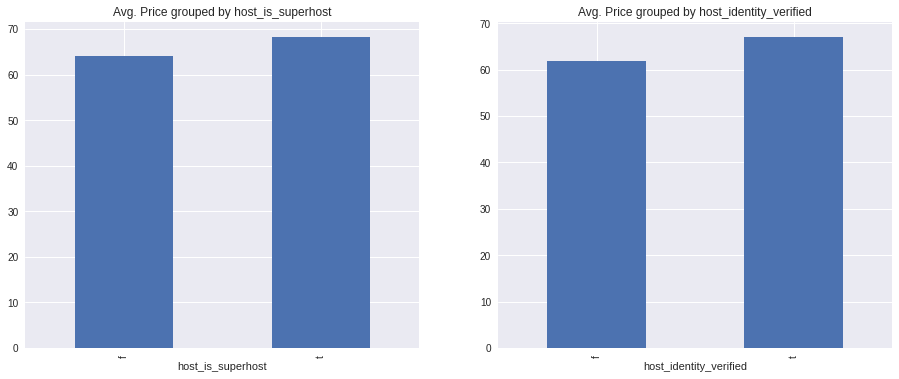

In [ ]:
n_cols = 3
n_rows = np.ceil((len(host)+1)/n_cols)
i = 1
for col in host:
  plt.subplot(n_rows, n_cols, i)
  avg_price_host = data.groupby(col).mean()["price"]
  avg_price_host.plot(kind="bar", figsize=(8*n_cols, 6*n_rows))
  plt.title("Avg. Price grouped by "+col)
  i=i+1

plt.show()

#Adjusting host data

In [ ]:
data["host_is_superhost"] = data["host_is_superhost"].replace(np.NAN, "f")
data["host_identity_verified"] =data["host_identity_verified"].replace(np.NAN, "f")

In [ ]:
#Adjusting Apartments data
data_apartments["host_is_superhost"] = data_apartments["host_is_superhost"].replace(np.NAN, "f")
data_apartments["host_identity_verified"] =data_apartments["host_identity_verified"].replace(np.NAN, "f")

Now we can perform a statistical test: t-test

In [ ]:
from scipy import stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
# Define multicomp function
def multicomp(target_name, group_name, data):
    if (np.nan in data[target_name]) | (np.nan in data[group_name]):
        print("Please remove NaN in target variable or group variable!")
    elif (data[target_name].nunique() == 1) | (data[group_name].nunique() == 1):
        print("There is only one unique value in target variable or group variable.")
    elif data[group_name].nunique() == 2:
        mod = MultiComparison(data[target_name], data[group_name])
        comp = mod.allpairtest(stats.ttest_ind)
        print(comp[0])
    else:
        mod = MultiComparison(data[target_name], data[group_name])
        print(mod.tukeyhsd().summary())
multicomp("price", "host_is_superhost", data)
multicomp("price", "host_identity_verified", data)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat  pval pval_corr reject
-------------------------------------------
     f      t -4.1106  0.0       0.0   True
-------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat  pval pval_corr reject
-------------------------------------------
     f      t -4.5387  0.0       0.0   True
-------------------------------------------


Both null hypotesis were rejected, so both values shall be used

In [ ]:
host_info = ["host_is_superhost", "host_identity_verified"]
for i in host_info:
  selected.append(i)
selected

['host_is_superhost', 'host_identity_verified']

Let's handle host verifications

In [ ]:
data["host_ver_types"] = data["host_verifications"].apply(lambda x: x[1:-1].replace("\'", "").split(", "))
#data["host_ver_types"]
#Ten kod sprawia, że z ['email', 'phone', 'reviews'] robi się [email, phone, reviews]

In [ ]:
data["host_ver_type_counts"] = data["host_ver_types"].apply(lambda x: len(x))
#Ten kod sprawia, że zliczamy ilość typów weryfikacji w danej nieruchomości
#data["host_ver_type_counts"] 

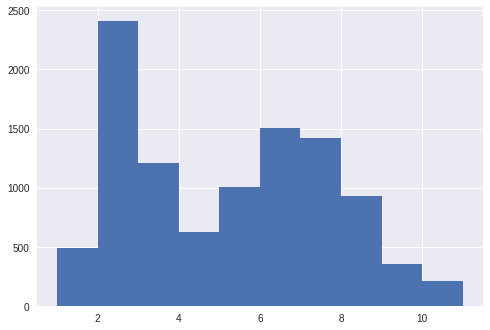

In [ ]:
data["host_ver_type_counts"].hist()

In [ ]:
host_ver_types = []
for i in data["host_ver_types"]:
    host_ver_types += i

#host_ver_types
#Ten kod iteruje nam po wszystkich typach weryfikacji i dodaje do nowo utworzonej listy (uwzględniając potęrzną ilość duplikatów)

In [ ]:
host_ver_types_freq = dict((x, host_ver_types.count(x)) for x in set(host_ver_types))
host_ver_types_freq
#Ten kod sprawdza, ile było weryfikacji daną drogą i imieszcza to w słowniku. Jakby co, to set, też jest zamknięty w {} i nie można zmienić jego wartości

{'': 21,
 'email': 9389,
 'facebook': 1072,
 'google': 961,
 'government_id': 5720,
 'identity_manual': 3131,
 'jumio': 3279,
 'kba': 25,
 'manual_offline': 160,
 'manual_online': 39,
 'offline_government_id': 4795,
 'on': 7,
 'phone': 10084,
 'reviews': 4629,
 'selfie': 3413,
 'sent_id': 5,
 'sesame': 5,
 'sesame_offline': 5,
 'weibo': 2,
 'work_email': 1451,
 'zhima_selfie': 9}

In [ ]:
host_ver_types_freq = pd.DataFrame.from_dict(host_ver_types_freq, orient="index")
#Robimy Dataframe z tego słownika powyżej
host_ver_types_freq.reset_index(inplace=True)
#Dokonujemy reset index
host_ver_types_freq.columns = ["Verification", "Frequency"]
#Zmieniamy nazwy kolumn
host_ver_types_freq = host_ver_types_freq.sort_values(by="Frequency", ascending=True)
#Szeregujemy
host_ver_types_freq = host_ver_types_freq[host_ver_types_freq.Frequency >25]
host_ver_types_freq

Verification  Frequency
5           manual_online         39
9          manual_offline        160
11                 google        961
12               facebook       1072
2              work_email       1451
14        identity_manual       3131
13                  jumio       3279
15                 selfie       3413
7                 reviews       4629
3   offline_government_id       4795
10          government_id       5720
16                  email       9389
19                  phone      10084

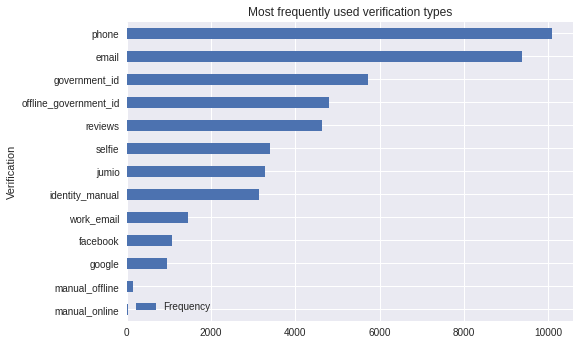

In [ ]:
host_ver_types_freq.plot.barh(x="Verification", y="Frequency")
plt.title("Most frequently used verification types")
plt.show()

#Geoplot

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly import tools
from plotly.offline import plot as plotoffline
import seaborn as sns

Creating a dataset

In [ ]:
geo = data[['latitude', 'longitude', 'price', 'price_range']]
geo = geo.sort_values("price", ascending=True) # This sorting is necessary for the color scale to work properly. 
geo.describe()

latitude     longitude         price
count  10160.000000  10160.000000  10160.000000
mean      37.979689     23.732160     65.687598
std        0.013628      0.013136     48.318223
min       37.946940     23.695780      7.000000
25%       37.968800     23.723870     36.000000
50%       37.978250     23.729870     50.000000
75%       37.987795     23.738600     78.250000
max       38.036250     23.793850    385.000000

Simple scatter plot

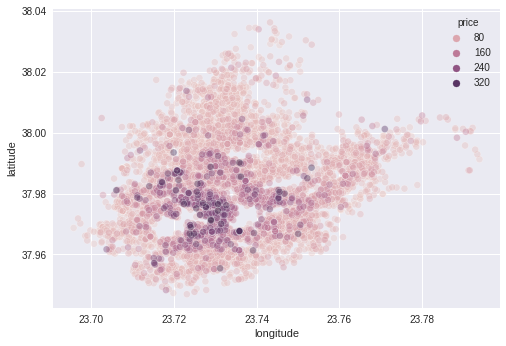

In [ ]:
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="price", 
                data=geo, 
                alpha=0.4)

Below we have created map with marked prices from several ranges

In [ ]:
# # Map plot
# from textwrap import wrap

# px.set_mapbox_access_token("pk.eyJ1IjoiZ2F3cm9ubiIsImEiOiJjbDNzeXllNWkxMnl4M2psdHRtZGZkODh0In0.hSntC8Rp50ICzYyvo606nA") # Replace XXX with your Mapbox Token

# #Token created here: https://account.mapbox.com/access-tokens 
# #I think, that simmilar map could be generated via one of books from python - ćwiczenia
# fig = px.scatter_mapbox(geo, 
#                         lat="latitude", 
#                         lon="longitude", 
#                         color="price_range",
#                         color_continuous_scale=px.colors.sequential.Aggrnyl,# Na tej stronie można sobie wybierać różne skale kolorów https://plotly.com/python/builtin-colorscales/
#                         opacity=0.9, 
#                         zoom=10)
# fig.show()

In [ ]:
data.neighbourhood_cleansed.unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΚΕΡΑΜΕΙΚΟΣ',
       'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΠΑΓΚΡΑΤΙ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ',
       'ΣΤΑΔΙΟ', 'ΝΕΑ ΚΥΨΕΛΗ', 'ΚΟΛΩΝΑΚΙ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΑΚΡΟΠΟΛΗ', 'ΠΑΤΗΣΙΑ', 'ΓΚΑΖΙ', 'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ',
       'ΘΗΣΕΙΟ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΠΕΤΡΑΛΩΝΑ',
       'ΓΟΥΒΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΠΡΟΜΠΟΝΑ', 'ΓΟΥΔΙ', 'ΝΕΟΣ ΚΟΣΜΟΣ',
       'ΚΟΛΩΝΟΣ', 'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΖΑΠΠΕΙΟ', 'ΛΥΚΑΒΗΤΤΟΣ',
       'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΥΖΗ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ',
       'ΠΟΛΥΓΩΝΟ', 'ΠΕΝΤΑΓΩΝΟ', 'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΡΗΓΙΛΛΗΣ', 'ΚΟΛΟΚΥΝΘΟΥ',
       'ΣΕΠΟΛΙΑ', 'ΡΙΖΟΥΠΟΛΗ'], dtype=object)

Top 5 places in Athens are:

Acropolis: 37.97237807190218, 23.725620452484446

Monastiraki: 37.97586675283399, 23.725989949994986

National Gardens: 37.972984829600264, 23.737371202961114

Lecabectus Hill: 37.9819622997117, 23.743218607666662

Museum of Cycladic Art: 37.97729866388215, 23.74239728870063

Calcuate the distance bwteen the listing and mianat tractions in Athens

In [ ]:
# Formula to calculate distances
from math import sin, cos, sqrt, atan2, radians
def distance(lat1, lat2, lon1, lon2):
    R = 6373.0
    rlat1 = radians(lat1)
    rlat2 = radians(lat2)
    rlon1 = radians(lon1)
    rlon2 = radians(lon2)
    rdlon = rlon2 - rlon1
    rdlat = rlat2 - rlat1
    a = sin(rdlat / 2)**2 + cos(rlat1) * cos(rlat2) * sin(rdlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [ ]:
# Top locations in Athens
toploc = {"Acropolis": [37.97237807190218, 23.725620452484446], 
          "Monastiraki": [37.97586675283399, 23.725989949994986], 
          "Gardens": [37.972984829600264, 23.737371202961114], 
          "Lecabectus": [37.9819622997117, 23.743218607666662], 
          "Museum": [37.97729866388215, 23.74239728870063]}

In [ ]:
toploc = pd.DataFrame.from_dict(toploc)
toploc_trans = toploc.transpose()
toploc_trans.columns = ["latitude", "longitude"]

In [ ]:
# # Draw a plot with top locations

# fig = px.scatter_mapbox(toploc_trans, 
#                         lat="latitude", 
#                         lon="longitude", 
#                         zoom=10)
# fig.show()

In [ ]:
# Construct distance columns
dist = []
for col in toploc.columns:
    data["dist_"+col] = data.apply(lambda x: distance(x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis=1)
    dist.append("dist_"+col)

#W liście dist znajdują się po prostu nazwy wszystkich hot lokacji
#W tej pętli for zliczamy odległości między danym miejscem, a jedną z top lokalizacji. Ta odległość wpisana została do jednej z 5 nowych kolumn - reprezentujących odległości do top lokacji

In [ ]:
dist_apartments = []
for col in toploc.columns:
    data_apartments["dist_"+col] = data_apartments.apply(lambda x: distance(x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis=1)
    dist_apartments.append("dist_"+col)

Below 5 last columns

In [ ]:
data.iloc[:5, -5:]

dist_Acropolis  dist_Monastiraki  dist_Gardens  dist_Lecabectus  \
0        3.918147          3.724886      3.001856         2.070579   
1        3.877873          3.678421      2.972189         2.022937   
2        3.889245          3.691968      2.979817         2.036789   
3        3.877873          3.678421      2.972189         2.022937   
4        3.929079          3.729538      3.022681         2.074019   

   dist_Museum  
0     2.368471  
1     2.334694  
2     2.343691  
3     2.334694  
4     2.385558

The correlation between price and dist_Acropolis is -0.2504 with a p-value of  0.0000.
The correlation between price and dist_Monastiraki is -0.2467 with a p-value of  0.0000.
The correlation between price and dist_Gardens is -0.2459 with a p-value of  0.0000.
The correlation between price and dist_Lecabectus is -0.1363 with a p-value of  0.0000.
The correlation between price and dist_Museum is -0.1997 with a p-value of  0.0000.


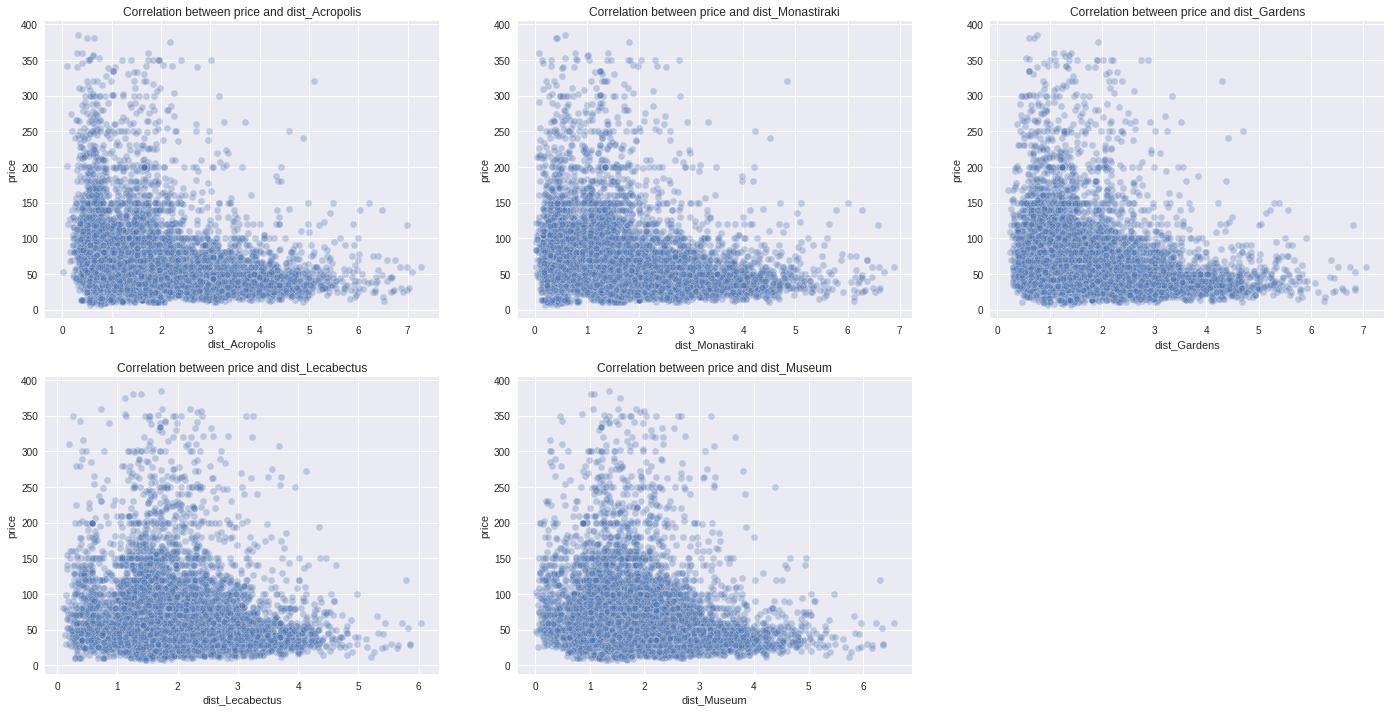

In [ ]:
n_cols = 3
n_rows = np.ceil((len(dist)+1)/n_cols)
i = 1
plt.figure(figsize=(8*n_cols, 6*n_rows))
for distance in dist:
  # Ważne, zeby zanotować, że distance przyjmuje nazwy nowo utworzonych kolumn
  plt.subplot(n_rows, n_cols, i)
  sns.scatterplot(x=distance, y="price", data=data, alpha=0.3)
  plt.title("Correlation between price and "+distance)
  i=i+1
  print("The correlation between price and "+distance+ " is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data[-data[distance].isna()][distance], data[-data[distance].isna()]["price"])))
  # W tym princie jest stats.pearsonr. Odpowiada to za policzenie korelacji Pearsona w odniesieniu do ceny - jest to funkcja ze scipy
plt.show()

Corellation is high everywhere and p value is always 0

In [ ]:
# Tutaj robimy sobie kolejny zestaw kolumn związanych z dystansem (z suffixem _close) - tutaj są one jednak skategoryzowane - True, jesli jest blisko i false, jesli jest daleko
#Tylko zmieniłem medianę na medianę * 0.8, żeby zawęzic kryterium, czy rzeczywiście jest blisko
for distance in dist:
   data[distance+"_close"] = (data[distance] < 0.8 * (data[distance].median()))
   print(data.groupby(distance+"_close").mean()["price"])

# Następnie dodajemy ostratnia kolumnę, w której dajemy werdykt na podstawie mediany, czy dany obiekt można uznać, za dobrze położony
# To było wcześniej: data["good_distance"] = data.apply(lambda x: any([x.dist_Acropolis_close, x.dist_Monastiraki_close, x.dist_Gardens_close, x.dist_Lecabectus_close, x.dist_Museum_close]), axis=1)
toploc_column_names = ['dist_{0}_close'.format(i) for i in toploc.columns]
data["good_distance"] = data.apply(lambda x: any(x[col] for col in toploc_column_names), axis=1)

dist_Acropolis_close
False    56.928711
True     79.010670
Name: price, dtype: float64
dist_Monastiraki_close
False    57.565371
True     80.167899
Name: price, dtype: float64
dist_Gardens_close
False    57.383591
True     81.122679
Name: price, dtype: float64
dist_Lecabectus_close
False    63.107489
True     71.155972
Name: price, dtype: float64
dist_Museum_close
False    60.811987
True     75.157834
Name: price, dtype: float64


In [ ]:
#Dodajemy do apartments odpowiednie dane 
for distance in dist_apartments:
   data_apartments[distance+"_close"] = (data_apartments[distance] < data_apartments[distance].median())

data_apartments["good_distance"] = data_apartments.apply(lambda x: any(x[col] for col in toploc_column_names), axis=1)

We can see histogram below, which informs us, that mean price of locations with small distance to top 5 attractions in the city is higher.

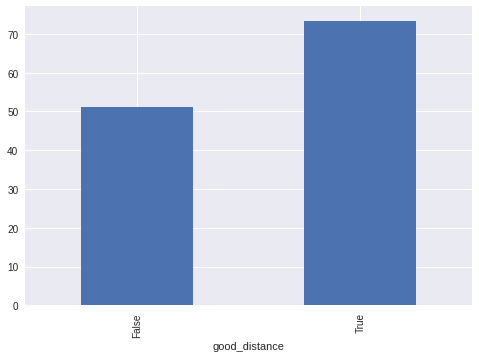

In [ ]:
data.groupby("good_distance").mean()["price"].plot(kind="bar")
plt.show()

In [ ]:
data.iloc[:10, -6:]

dist_Acropolis_close  dist_Monastiraki_close  dist_Gardens_close  \
0                 False                   False               False   
1                 False                   False               False   
2                 False                   False               False   
3                 False                   False               False   
4                 False                   False               False   
5                  True                    True                True   
6                  True                    True               False   
7                 False                   False               False   
8                  True                    True                True   
9                 False                   False                True   

   dist_Lecabectus_close  dist_Museum_close  good_distance  
0                  False              False          False  
1                  False              False          False  
2                  False              False          False  
3                  False              False          False  
4                  False              False          False  
5                   True               True           True  
6                  False              False           True  
7                  False              False          False  
8                   True               True           True  
9                   True               True           True

We can append then this criterion to our selected table:

In [ ]:
selected.append("good_distance")
selected

['host_is_superhost', 'host_identity_verified', 'good_distance']

#Neighbourhood statistics

We would also like to check the popularity and price level at each neighbourhood of Geneva.

In [ ]:
# Top popular nerghbourhoods
neighbourhood_group_pop = pd.DataFrame(data["neighbourhood_cleansed"].value_counts())
neighbourhood_group_pop.head(5)
#Tutaj zliczamy, ile jest lokali w danych dzielniach

neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                              1915
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                                  869
ΝΕΟΣ ΚΟΣΜΟΣ                                          806
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                             717
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ                     584

In [ ]:
# Average price of each neighbourhood
neighbourhood_group_price = data.groupby("neighbourhood_cleansed").mean()["price"]
neighbourhood_group_price = pd.DataFrame(neighbourhood_group_price)
neighbourhood_group_price.sort_values("price", ascending=False).head(5)
#Tutaj zliczamy sredną cenę w danej dzielni - jeszcze posortowane

price
neighbourhood_cleansed           
ΖΑΠΠΕΙΟ                 99.985294
ΚΟΛΩΝΑΚΙ                92.288754
ΑΚΡΟΠΟΛΗ                86.000000
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  81.634987
ΛΥΚΑΒΗΤΤΟΣ              80.598291

In [ ]:
# Create neighbourhood stats
neighbourhood_stat = pd.merge(neighbourhood_group_pop, 
                              neighbourhood_group_price, 
                              how="inner", left_index=True, right_index=True)
neighbourhood_stat.reset_index(inplace=True)
neighbourhood_stat.columns = ["neighbourhood_cleansed", "count_properties", "avg_price"]
neighbourhood_stat = neighbourhood_stat.sort_values(by="count_properties", ascending=False)
neighbourhood_stat.head(10)
#Tutaj mamy obie te listy zestawione

neighbourhood_cleansed  count_properties  avg_price
0            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1915  81.634987
1               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ               869  72.199079
2                       ΝΕΟΣ ΚΟΣΜΟΣ               806  60.367246
3          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ               717  57.476987
4  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ               584  60.018836
5                          ΠΑΓΚΡΑΤΙ               453  55.037528
6                   ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ               393  46.435115
7                          ΚΟΛΩΝΑΚΙ               329  92.288754
8                          ΑΚΡΟΠΟΛΗ               328  86.000000
9                       ΑΜΠΕΛΟΚΗΠΟΙ               327  53.492355

In [ ]:
#Addition of filter, which consists of neighbourhoods with at least XXXX properties
neighbourhood_stat_limited = neighbourhood_stat[neighbourhood_stat['count_properties']>150]
neighbourhood_stat_limited

neighbourhood_cleansed  count_properties  avg_price
0             ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1915  81.634987
1                ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ               869  72.199079
2                        ΝΕΟΣ ΚΟΣΜΟΣ               806  60.367246
3           ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ               717  57.476987
4   ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ               584  60.018836
5                           ΠΑΓΚΡΑΤΙ               453  55.037528
6                    ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ               393  46.435115
7                           ΚΟΛΩΝΑΚΙ               329  92.288754
8                           ΑΚΡΟΠΟΛΗ               328  86.000000
9                        ΑΜΠΕΛΟΚΗΠΟΙ               327  53.492355
10                            ΘΗΣΕΙΟ               315  76.755556
11                        ΚΕΡΑΜΕΙΚΟΣ               259  78.069498
12                         ΠΕΤΡΑΛΩΝΑ               256  52.066406
13                            ΙΛΙΣΙΑ               230  61.965217
14                            ΣΤΑΔΙΟ               220  66.981818
15                            ΚΥΨΕΛΗ               218  49.798165
16                             ΓΟΥΔΙ               211  55.369668

<Figure size 576x396 with 0 Axes>

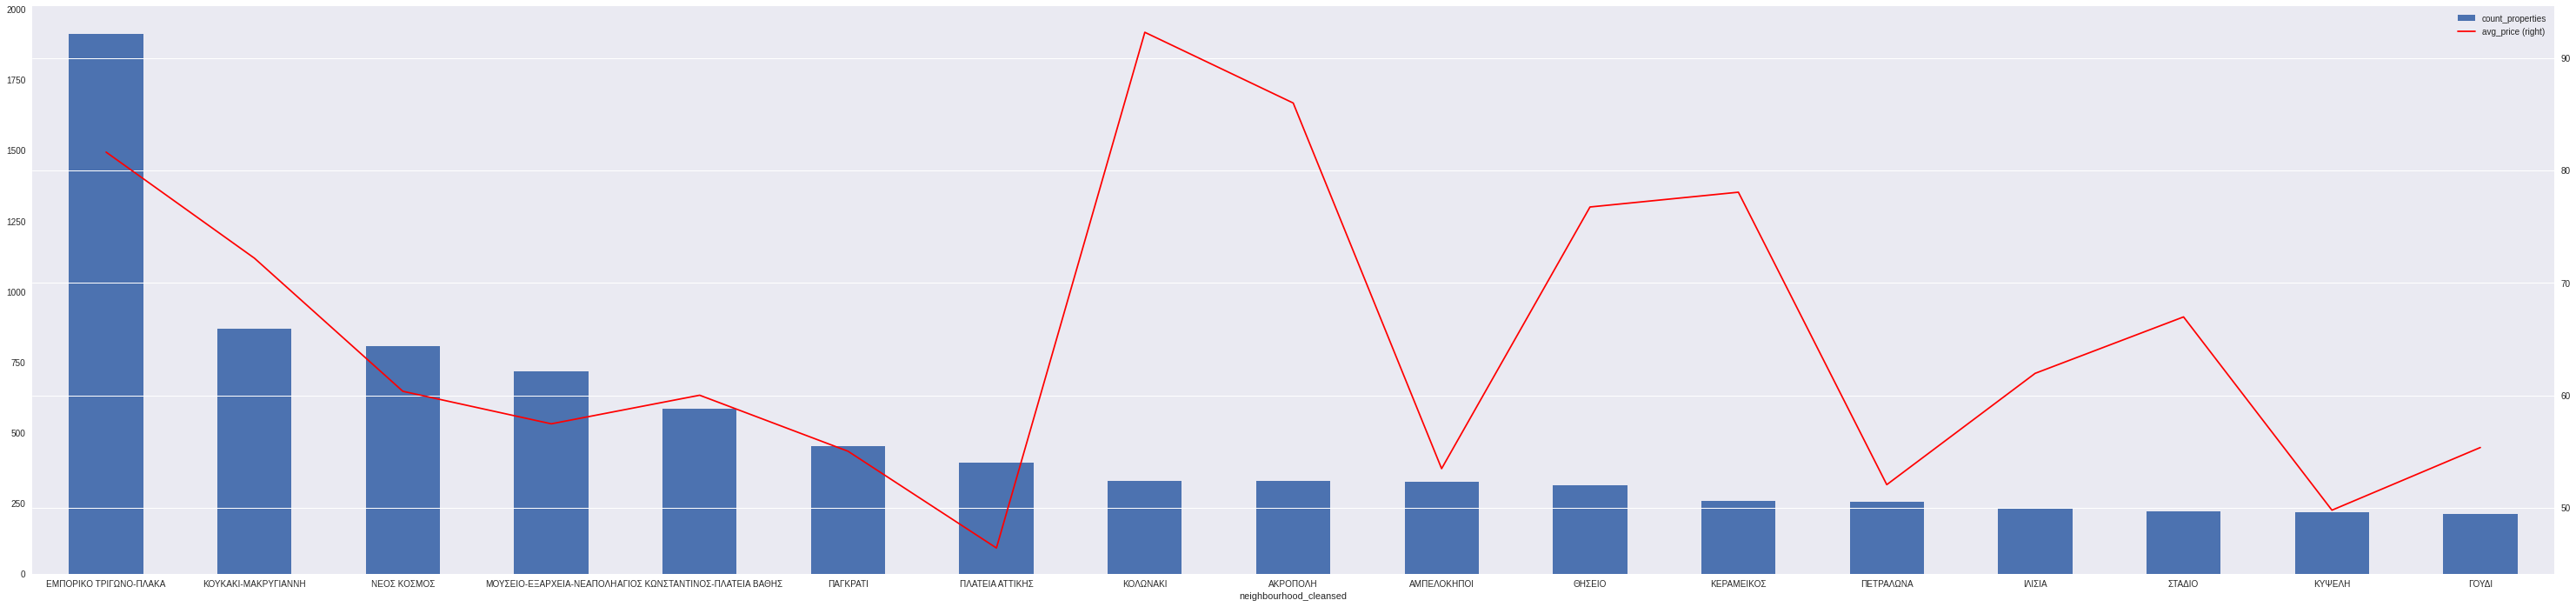

In [ ]:
#Drawing a plot with relation - No. of properties vs avg price in selected neighbourhood
fig = plt.figure()

ax = neighbourhood_stat_limited.plot(x="neighbourhood_cleansed", y="count_properties", kind="bar", figsize=(52, 12))
neighbourhood_stat_limited.plot(x="neighbourhood_cleansed", y="avg_price", secondary_y=True, color="red", ax=ax)

plt.show()

#Condition statistics

We would also like to check the impact of conditions.

!!!Uwaga. Z racji, iż u nas jest inny zestaw parametrów, niż w Berlinie, to lista condition została podmieniona!!!!

In [ ]:
condition = ['property_type', 'room_type', 'amenities', 'minimum_nights', 'maximum_nights']

In [ ]:
data[condition].head()

property_type        room_type  \
0  Entire rental unit  Entire home/apt   
1  Entire rental unit  Entire home/apt   
2  Entire rental unit  Entire home/apt   
3  Entire rental unit  Entire home/apt   
4  Entire rental unit  Entire home/apt   

                                           amenities  minimum_nights  \
0  ["Refrigerator", "Free street parking", "Iron"...               1   
1  ["Refrigerator", "Free street parking", "Iron"...               1   
2  ["Refrigerator", "Free street parking", "Iron"...               1   
3  ["Refrigerator", "Free street parking", "Iron"...               1   
4  ["Refrigerator", "Free street parking", "Iron"...               1   

   maximum_nights  
0            1125  
1            1125  
2            1125  
3            1125  
4            1125

property type

In [ ]:
# Tutaj zliczamy ile jest danych typów lokali i przypisujemy temu typowi avg cenę
prop_type_avg_price = data.groupby("property_type").mean()["price"]
prop_type_count_listings = data["property_type"].value_counts()
prop_type_stat = pd.merge(prop_type_count_listings, prop_type_avg_price, how="inner", left_index=True, right_index=True)
prop_type_stat.columns = ["count_prop", "avg_price"]
prop_type_stat.sort_values(by="count_prop", ascending=False).head(10)

count_prop   avg_price
Entire rental unit                         6839   63.843691
Entire condominium (condo)                 1375   62.536727
Private room in rental unit                 428   32.528037
Entire residential home                     254   92.559055
Entire serviced apartment                   171   93.502924
Room in hotel                               170   94.417647
Entire loft                                 153   76.385621
Room in aparthotel                          152  110.164474
Room in boutique hotel                      112  136.562500
Private room in condominium (condo)          76   28.473684

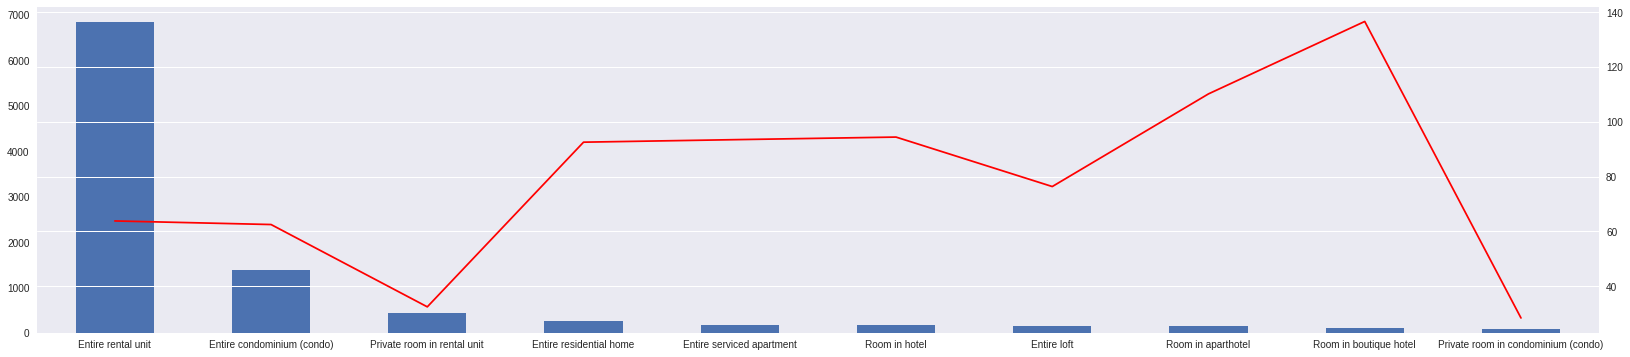

In [ ]:
#Drawing a plot with relation - No. of properties vs avg price in selected property type
prop_type_stat_limited = prop_type_stat[prop_type_stat['count_prop']>60] #Trzeba było ograniczyć liczbe rodzajów lokli
fig = plt.figure()
ax = prop_type_stat_limited['count_prop'].plot(x="neighbourhood_cleansed", y="count_properties", kind="bar", figsize=(28, 6))
prop_type_stat_limited['avg_price'].plot(x="neighbourhood_cleansed", y="avg_price", secondary_y=True, color="red", ax=ax)
plt.show()

Room type

In [ ]:
# Tutaj zliczamy ile jest danych typów pokoi i przypisujemy temu typowi avg cenę
room_type_avg_price = data.groupby("room_type").mean()["price"]
room_type_count_listings = data["room_type"].value_counts()
room_type_stat = pd.merge(room_type_count_listings, room_type_avg_price, how="inner", left_index=True, right_index=True)
room_type_stat.columns = ["count_prop", "avg_price"]
room_type_stat.sort_values(by="count_prop", ascending=False).head(10)

count_prop   avg_price
Entire home/apt        8962   65.770922
Private room            981   61.622834
Hotel room              133  119.969925
Shared room              84   18.321429

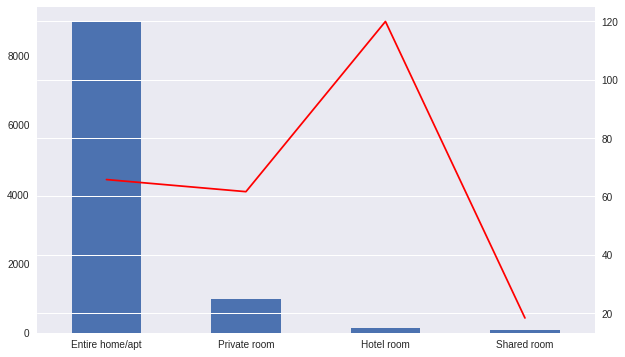

In [ ]:
#Drawing a plot with relation - No. of properties vs avg price in selected room type
fig = plt.figure()
ax = room_type_stat['count_prop'].plot(x="neighbourhood_cleansed", y="count_properties", kind="bar", figsize=(10, 6))
room_type_stat['avg_price'].plot(x="neighbourhood_cleansed", y="avg_price", secondary_y=True, color="red", ax=ax)
plt.show()

Entire apartment has a significant higher price than a private room. Therefore we take it into our model.

In [ ]:
data["is_entire_apt"] = data["room_type"]=="Entire home/apt"
selected.append("is_entire_apt")

In [ ]:
#Adjusting Apartments data
data_apartments["is_entire_apt"] = data_apartments["room_type"]=="Entire home/apt"

Amendities

In [ ]:
data["amenities"].head()

0    ["Refrigerator", "Free street parking", "Iron"...
1    ["Refrigerator", "Free street parking", "Iron"...
2    ["Refrigerator", "Free street parking", "Iron"...
3    ["Refrigerator", "Free street parking", "Iron"...
4    ["Refrigerator", "Free street parking", "Iron"...
Name: amenities, dtype: object

In [ ]:
data["amenities"] =data["amenities"].apply(lambda x: x[1:-1].replace("\'", "").replace(' "', '').replace('"', '').replace(" ", "_").split(","))
data["amenities"].head()

0    [Refrigerator, Free_street_parking, Iron, Air_...
1    [Refrigerator, Free_street_parking, Iron, Air_...
2    [Refrigerator, Free_street_parking, Iron, Bed_...
3    [Refrigerator, Free_street_parking, Iron, Air_...
4    [Refrigerator, Free_street_parking, Iron, Air_...
Name: amenities, dtype: object

In [ ]:
#Adjusting Apartments data
data_apartments["amenities"] =data_apartments["amenities"].apply(lambda x: x[1:-1].replace("\'", "").replace(' "', '').replace('"', '').replace(" ", "_").split(","))

In [ ]:
# Tutaj rozpisujemy wszystkie występujące amenities
amenity_types = []
for i in data["amenities"]:
    amenity_types += i
#amenity_types

In [ ]:
#Adjusting Apartments data
amenity_types_apartments = []
for i in data_apartments["amenities"]:
    amenity_types_apartments += i

In [ ]:
#Wyliczamy, ile jest danych amenity types i szeregujemy je po descending
amenity_types_freq = dict((x, amenity_types.count(x)) for x in set(amenity_types))
amenity_types_freq = pd.DataFrame.from_dict(amenity_types_freq, orient="index")
amenity_types_freq.reset_index(inplace=True)
amenity_types_freq.columns = ["Amenity", "Frequency"]
amenity_types_freq = amenity_types_freq.sort_values(by="Frequency", ascending=False)
amenity_types_freq.head(40)

In [ ]:
#Adjusting Apartments data
amenity_types_freq_apartments = dict((x, amenity_types_apartments.count(x)) for x in set(amenity_types_apartments))
amenity_types_freq_apartments = pd.DataFrame.from_dict(amenity_types_freq_apartments, orient="index")
amenity_types_freq_apartments.reset_index(inplace=True)
amenity_types_freq_apartments.columns = ["Amenity", "Frequency"]
amenity_types_freq_apartments = amenity_types_freq_apartments.sort_values(by="Frequency", ascending=False)

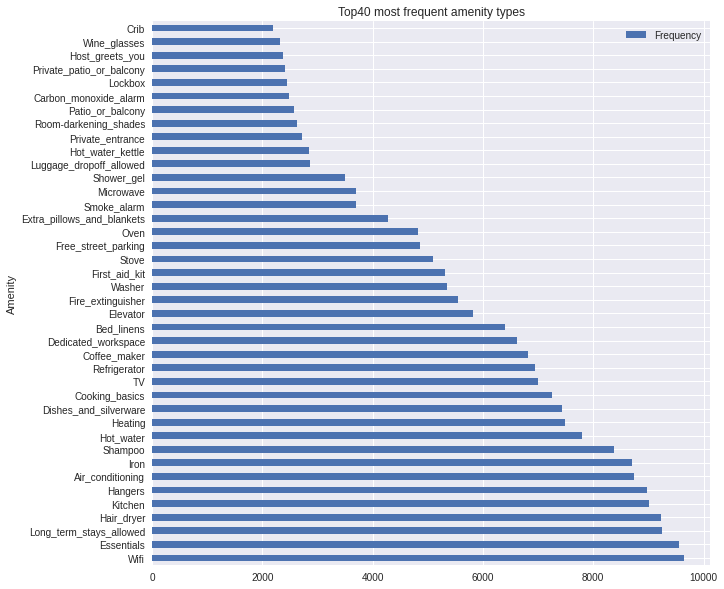

In [ ]:
# Tysujemy plota z 20 najbardziej popularnymi
amenity_types_freq.head(40).plot.barh(x="Amenity", y="Frequency", figsize=(10, 10))
plt.title("Top40 most frequent amenity types")
plt.show()

90%+ listings have the Top3 features: kitchen, Essentials and heatLong term stays allowed. Therefore they won't have a huge impact on price. We choose to focuse on features that ~50% listings have. They are:

It is different, than in other cases - we need to use a for loop, to compleete the same thng, as below

Below selected Amenities, which are in locations between 0.4 and 0.7 of all locales 

In [ ]:
amenity_types_freq_selected = amenity_types_freq[amenity_types_freq.Frequency.between(0.4 * data.shape[0], 0.7 * data.shape[0])]
amenity_types_freq_selected

Amenity  Frequency
325                           TV       6992
442                 Refrigerator       6948
871                 Coffee_maker       6819
330          Dedicated_workspace       6622
672                   Bed_linens       6405
1061                    Elevator       5820
271            Fire_extinguisher       5543
17                        Washer       5352
697                First_aid_kit       5311
698                        Stove       5091
606          Free_street_parking       4860
782                         Oven       4821
1030  Extra_pillows_and_blankets       4282

gettling list of selected Amenities

In [ ]:
amenity_list = list(amenity_types_freq_selected.Amenity)
amenity_list

['TV',
 'Refrigerator',
 'Coffee_maker',
 'Dedicated_workspace',
 'Bed_linens',
 'Elevator',
 'Fire_extinguisher',
 'Washer',
 'First_aid_kit',
 'Stove',
 'Free_street_parking',
 'Oven',
 'Extra_pillows_and_blankets']

Code responsible for aggregation of new dummy columns with chosen amenities

In [ ]:
for i in amenity_list:
  data["with_"+i] = data["amenities"].apply(lambda x: i in x)

In [ ]:
#Adjusting Apartments data
for i in amenity_list:
  data_apartments["with_"+i] = data_apartments["amenities"].apply(lambda x: i in x)

In [ ]:
data.iloc[:10, -(len(amenity_list)):]

with_TV  with_Refrigerator  with_Coffee_maker  with_Dedicated_workspace  \
0    False               True               True                      True   
1     True               True               True                      True   
2    False               True               True                      True   
3    False               True               True                     False   
4    False               True               True                      True   
5    False               True               True                      True   
6    False              False               True                     False   
7     True               True               True                      True   
8     True               True               True                      True   
9     True              False              False                     False   

   with_Bed_linens  with_Elevator  with_Fire_extinguisher  with_Washer  \
0             True          False                   False         True   
1             True          False                   False         True   
2             True          False                   False        False   
3             True          False                   False        False   
4             True          False                   False         True   
5             True           True                   False        False   
6             True          False                    True        False   
7             True           True                   False         True   
8             True           True                    True         True   
9            False           True                   False         True   

   with_First_aid_kit  with_Stove  with_Free_street_parking  with_Oven  \
0               False       False                      True       True   
1               False        True                      True       True   
2               False       False                      True      False   
3               False       False                      True       True   
4               False        True                      True       True   
5               False        True                     False       True   
6                True       False                     False      False   
7                True        True                      True       True   
8               False        True                     False       True   
9               False       False                     False      False   

   with_Extra_pillows_and_blankets  
0                             True  
1                             True  
2                             True  
3                             True  
4                             True  
5                             True  
6                             True  
7                             True  
8                             True  
9                            False

In [ ]:
for amenit in data.iloc[:, -(len(amenity_list)):].columns:
  print(amenit)
  print(multicomp("price", amenit, data))

with_TV
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 False   True -1.8571 0.0633    0.0633  False
---------------------------------------------
None
with_Refrigerator
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2  stat pval pval_corr reject
-----------------------------------------
 False   True 6.399  0.0       0.0   True
-----------------------------------------
None
with_Coffee_maker
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 False   True -3.6758 0.0002    0.0002   True
---------------------------------------------
None
with_Dedicated_workspace
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 g

In [ ]:
# Pozbywamy się tych, gdize nie odrzuciliśmy H0
elements_to_remove = ['TV', 'Bed_linens', 'Washer', 'Extra_pillows_and_blankets']
for element in elements_to_remove:
  amenity_list.remove(element)
amenity_list


['Refrigerator',
 'Coffee_maker',
 'Dedicated_workspace',
 'Elevator',
 'Fire_extinguisher',
 'First_aid_kit',
 'Stove',
 'Free_street_parking',
 'Oven']

In [ ]:
data.iloc[:, -(len(amenity_list)):].columns

Index(['with_Bed_linens', 'with_Elevator', 'with_Fire_extinguisher',
       'with_Washer', 'with_First_aid_kit', 'with_Stove',
       'with_Free_street_parking', 'with_Oven',
       'with_Extra_pillows_and_blankets'],
      dtype='object')

We can reject null hypotesis for all selected amenities!

In [ ]:
for i in amenity_list:
    selected.append("with_"+i)

In [ ]:
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Refrigerator',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher',
 'with_First_aid_kit',
 'with_Stove',
 'with_Free_street_parking',
 'with_Oven']

Minimum nights

In [ ]:
data["minimum_nights"].describe()

count    10160.000000
mean         3.267028
std         19.135774
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max       1000.000000
Name: minimum_nights, dtype: float64

In [ ]:
for i in range(2, 10):
  data['min_nights_greater_than_{}'.format(i)] = data["minimum_nights"] > i
  multicomp("price", 'min_nights_greater_than_{}'.format(i), data=data)
data.iloc[:10, -8:]

In [ ]:
#Adjusting apartments data
for i in range(2, 10):
  data_apartments['min_nights_greater_than_{}'.format(i)] = data_apartments["minimum_nights"] > i
  multicomp("price", 'min_nights_greater_than_{}'.format(i), data=data_apartments)

There is only one unique value in target variable or group variable.
There is only one unique value in target variable or group variable.
There is only one unique value in target variable or group variable.
There is only one unique value in target variable or group variable.
There is only one unique value in target variable or group variable.
There is only one unique value in target variable or group variable.
There is only one unique value in target variable or group variable.
There is only one unique value in target variable or group variable.


Lets see about maximum nights

In [ ]:
data["maximum_nights"].describe()

count    10160.000000
mean       728.961811
std        491.616173
min          1.000000
25%         90.000000
50%       1125.000000
75%       1125.000000
max       4444.000000
Name: maximum_nights, dtype: float64

it is hard to estimate something here, so lets ged rid of this max nights criterion

#Review statistics

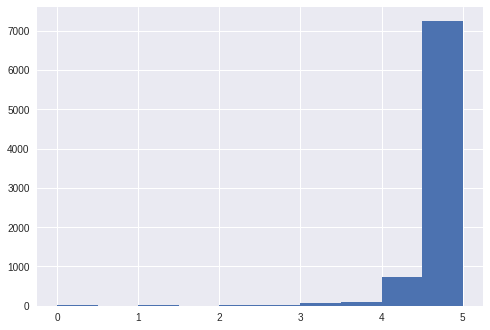

In [ ]:
data["review_scores_rating"].hist()

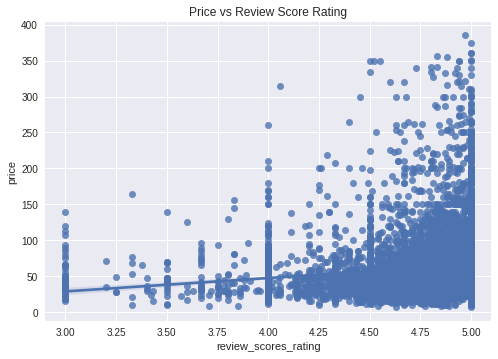

The correlation between review score and price is  0.0802 with a p-value of  0.0000.


In [ ]:
# Scatter plot between review score and price
import seaborn as sns
import scipy.stats as stats
sns.regplot(x="review_scores_rating", y="price", data=data[data["review_scores_rating"]>=3])
plt.title("Price vs Review Score Rating")
plt.show()
print("The correlation between review score and price is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data[-data["review_scores_rating"].isna()]["review_scores_rating"], data[-data["review_scores_rating"].isna()]["price"])))

Check the correlation between price and other scores

In [ ]:
for col in review:
    print(("The pearson correlation coefficient between " + col + " and price is {0[0]: .4f} with a p-value of {0[1]: .4f}.").format(stats.pearsonr(data[-data[col].isna()][col],data[-data[col].isna()]["price"])))

The pearson correlation coefficient between review_scores_rating and price is  0.0802 with a p-value of  0.0000.
The pearson correlation coefficient between review_scores_accuracy and price is  0.0547 with a p-value of  0.0000.
The pearson correlation coefficient between review_scores_cleanliness and price is  0.1038 with a p-value of  0.0000.
The pearson correlation coefficient between review_scores_checkin and price is  0.0565 with a p-value of  0.0000.
The pearson correlation coefficient between review_scores_communication and price is  0.0497 with a p-value of  0.0000.
The pearson correlation coefficient between review_scores_location and price is  0.1147 with a p-value of  0.0000.
The pearson correlation coefficient between review_scores_value and price is  0.0485 with a p-value of  0.0000.


Here we can see, that corelation is significant for all scores

Lets write an universal code, to choose proper review attributes

In [ ]:
selected_reviews = []
for col in review:
  if stats.pearsonr(data[-data[col].isna()][col],data[-data[col].isna()]["price"])[1] < 0.05: # Wybieramy te atrybuty, które mają p-value mniejsze od 0.05
    selected_reviews.append(col)

selected_reviews

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [ ]:
for i in selected_reviews:
    selected.append(i)

selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Refrigerator',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher',
 'with_First_aid_kit',
 'with_Stove',
 'with_Free_street_parking',
 'with_Oven',
 'min_nights_greater_than_3',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

#Size of apartment

Look at size-related variables

In [ ]:
#Need to adjust data to Riga provided columns
size = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
data[size].head(10)

accommodates  bathrooms  bedrooms  beds
0             8        NaN       3.0   5.0
1             4        NaN       1.0   1.0
2             2        NaN       NaN   1.0
3             4        NaN       1.0   2.0
4             4        NaN       1.0   1.0
5             4        NaN       1.0   2.0
6             1        NaN       1.0   1.0
7             5        NaN       2.0   2.0
8             7        NaN       3.0   5.0
9             2        NaN       1.0   1.0

In [ ]:
data['bathrooms'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bathrooms, dtype: float64

it occour, that there are no valuable info in bathrooms column

In [ ]:
data['bathrooms_text'].unique()

array(['2 baths', '1 bath', '1 shared bath', '1.5 baths', '2.5 baths',
       '5.5 baths', '4 baths', '3.5 baths', '4.5 baths',
       '1.5 shared baths', '1 private bath', '0 baths', '3 baths',
       'Half-bath', '2 shared baths', '5 baths', '3 shared baths', nan,
       '9.5 baths', 'Shared half-bath', '7 baths', '2.5 shared baths',
       '4 shared baths', '6 baths', '5 shared baths', '0 shared baths',
       'Private half-bath', '3.5 shared baths'], dtype=object)

But we count find something interesting in 'bathrooms_text column'

In [ ]:
data['bathrooms'] = np.where(data['bathrooms_text'].str.contains('half',case=False, na=False), 0.5, 
                          data['bathrooms_text'].str.split().str[0]).astype(np.float64)
data[size].head(10)

accommodates  bathrooms  bedrooms  beds
0             8        2.0       3.0   5.0
1             4        1.0       1.0   1.0
2             2        1.0       NaN   1.0
3             4        1.0       1.0   2.0
4             4        1.0       1.0   1.0
5             4        1.0       1.0   2.0
6             1        1.0       1.0   1.0
7             5        1.0       2.0   2.0
8             7        1.5       3.0   5.0
9             2        1.0       1.0   1.0

Check the correlation between number of accommodates and price

In [ ]:
data["accommodates"].describe()

count    10160.00000
mean         3.75502
std          1.92949
min          1.00000
25%          2.00000
50%          4.00000
75%          4.00000
max         16.00000
Name: accommodates, dtype: float64

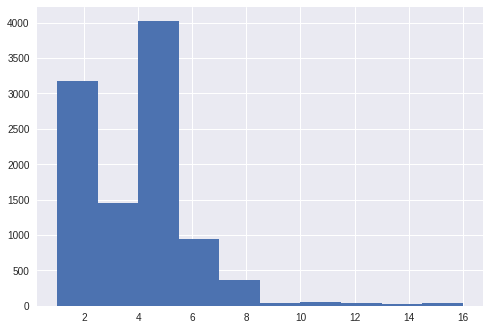

In [ ]:
data["accommodates"].hist()

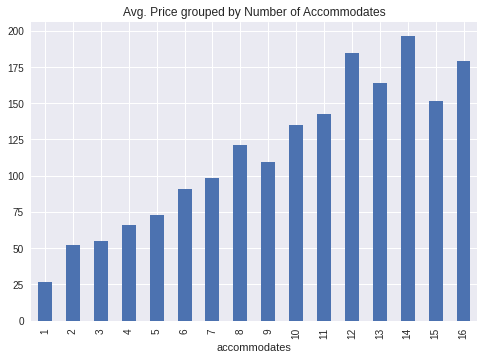

The pearson correlation coefficient between ther number of acoommodates and price is  0.4124 with a p-value of  0.0000.


In [ ]:
data.groupby("accommodates").mean()["price"].plot(kind="bar")
plt.title("Avg. Price grouped by Number of Accommodates")
plt.show()
print("The pearson correlation coefficient between ther number of acoommodates and price is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(data["accommodates"], data["price"])))

Accommodates can be used as a proxy of space and has sig. correlation with price.

In [ ]:
selected.append("accommodates")
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Refrigerator',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher',
 'with_First_aid_kit',
 'with_Stove',
 'with_Free_street_parking',
 'with_Oven',
 'min_nights_greater_than_3',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'accommodates']

Check the correlation bewteen accommodates and other size variables

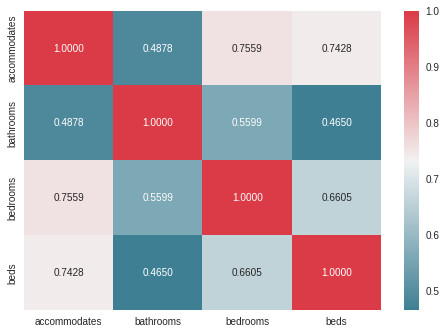

In [ ]:
size_variables = data[size]
size_corr = size_variables.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(size_corr, cmap=colormap, annot=True, fmt=".4f")

Conclusion: the variable "accommodates" is highly correlated with "beds" and "bedrooms", so it is sufficient to include only accommodates into our model.

nevertheless, due to bedrooms is more important factor, when we are concluding buying apartment - i will add this factor too.

In [ ]:
selected.append("bedrooms")
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Refrigerator',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher',
 'with_First_aid_kit',
 'with_Stove',
 'with_Free_street_parking',
 'with_Oven',
 'min_nights_greater_than_3',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'accommodates',
 'bedrooms']

Since always no. of bathrooms is always mentioned, I will add it also

In [ ]:
selected.append("bathrooms")
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Refrigerator',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher',
 'with_First_aid_kit',
 'with_Stove',
 'with_Free_street_parking',
 'with_Oven',
 'min_nights_greater_than_3',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'accommodates',
 'bedrooms',
 'bathrooms']

#Other conditions

In [ ]:
# I had to limit it due to Vienna data
others = ['instant_bookable']
data[others].head()

instant_bookable
0                t
1                t
2                t
3                t
4                t

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.05, alphacBonf=0.050
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     f      t -1.8273 0.0677    0.0677  False
---------------------------------------------


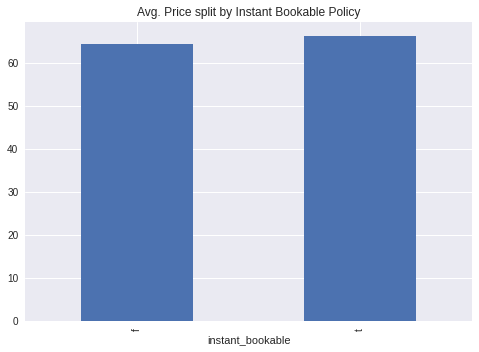

In [ ]:
data["instant_bookable"].value_counts()
multicomp("price", "instant_bookable", data)
data.groupby("instant_bookable").mean()["price"].plot(kind="bar")
plt.title("Avg. Price split by Instant Bookable Policy")
plt.show()

We won't add instant bookable then

We have all selected values!!!

#Feature engineering

In [ ]:
data[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10160 entries, 0 to 10262
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            10160 non-null  object 
 1   host_identity_verified       10160 non-null  object 
 2   good_distance                10160 non-null  bool   
 3   is_entire_apt                10160 non-null  bool   
 4   with_Refrigerator            10160 non-null  bool   
 5   with_Coffee_maker            10160 non-null  bool   
 6   with_Dedicated_workspace     10160 non-null  bool   
 7   with_Elevator                10160 non-null  bool   
 8   with_Fire_extinguisher       10160 non-null  bool   
 9   with_First_aid_kit           10160 non-null  bool   
 10  with_Stove                   10160 non-null  bool   
 11  with_Free_street_parking     10160 non-null  bool   
 12  with_Oven                    10160 non-null  bool   
 13  min_nights_great

Convert string variables into categorical variables

In [ ]:
for sel in selected:
  if data[sel].dtype == 'O': # Zamieniamy tutaj dane, które są typu Object na bool
    data[sel] = data[sel]=="t"

data[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10160 entries, 0 to 10262
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            10160 non-null  bool   
 1   host_identity_verified       10160 non-null  bool   
 2   good_distance                10160 non-null  bool   
 3   is_entire_apt                10160 non-null  bool   
 4   with_Refrigerator            10160 non-null  bool   
 5   with_Coffee_maker            10160 non-null  bool   
 6   with_Dedicated_workspace     10160 non-null  bool   
 7   with_Elevator                10160 non-null  bool   
 8   with_Fire_extinguisher       10160 non-null  bool   
 9   with_First_aid_kit           10160 non-null  bool   
 10  with_Stove                   10160 non-null  bool   
 11  with_Free_street_parking     10160 non-null  bool   
 12  with_Oven                    10160 non-null  bool   
 13  min_nights_great

In [ ]:
#To samo, co powyżej, tylko innym sposobem
for col in data[selected].select_dtypes("bool").columns:
    data[col] = data[col].astype("int")

In [ ]:
data[selected].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10160 entries, 0 to 10262
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            10160 non-null  int64  
 1   host_identity_verified       10160 non-null  int64  
 2   good_distance                10160 non-null  int64  
 3   is_entire_apt                10160 non-null  int64  
 4   with_Refrigerator            10160 non-null  int64  
 5   with_Coffee_maker            10160 non-null  int64  
 6   with_Dedicated_workspace     10160 non-null  int64  
 7   with_Elevator                10160 non-null  int64  
 8   with_Fire_extinguisher       10160 non-null  int64  
 9   with_First_aid_kit           10160 non-null  int64  
 10  with_Stove                   10160 non-null  int64  
 11  with_Free_street_parking     10160 non-null  int64  
 12  with_Oven                    10160 non-null  int64  
 13  min_nights_great

In [ ]:
#Adjusting apartments data
for sel in selected:
  if data_apartments[sel].dtype == 'O': # Zamieniamy tutaj dane, które są typu Object na bool
    data_apartments[sel] = data_apartments[sel]=="t"

In [ ]:
#Adjusting apartments data
for col in data_apartments[selected].select_dtypes("bool").columns:
    data_apartments[col] = data_apartments[col].astype("int")

Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledFeatures = sc.fit_transform(data[selected])
scaledFeatures

array([[ 1.27063513,  0.58144178, -1.36454089, ...,  2.20016185,
         2.01668633,  1.72488956],
       [ 1.27063513,  0.58144178, -1.36454089, ...,  0.12697264,
        -0.62600535, -0.40894677],
       [ 1.27063513,  0.58144178, -1.36454089, ..., -0.90962197,
                nan, -0.40894677],
       ...,
       [-0.78700799,  0.58144178, -1.36454089, ...,  1.16356724,
         2.01668633, -0.40894677],
       [-0.78700799, -1.71986265,  0.73284722, ...,  0.12697264,
        -0.62600535, -0.40894677],
       [-0.78700799,  0.58144178,  0.73284722, ..., -0.90962197,
                nan, -0.40894677]])

In [ ]:
#Adjusting apartments data
scaledFeatures_apartments = sc.fit_transform(data_apartments[selected])

#XGB

In [ ]:
# Load packages and create test set
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

X = scaledFeatures
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize XGBoost classifier and find the best parameter sets with Grid Search CV
xgb_clf = xgb.XGBRegressor()
parameters = {'n_estimators': [60, 80, 100, 120], 'max_depth':[3,5,7,9]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

[10:05:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 5, 'n_estimators': 80}


In [ ]:
# Xgb with best parameters
xgb_clf = xgb.XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'])
xgb_clf.fit(X_train, y_train)
y_test_pred = xgb_clf.predict(X_test)
print("R^2 score is: {0: .4f}".format(r2_score(y_test, y_test_pred)))
print("RMSE is: {0: .4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

[10:05:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 score is:  0.4484
RMSE is:  37.3115


We can compare now resuts to predictions

In [ ]:
results_compared= {'Real values': y_test,
                   'Predicted_Values': y_test_pred}
results_compared = pd.DataFrame(results_compared)
#results_compared.head(30)

In [ ]:
#Now lets run XGB for apartments

y_test_pred_apartments = xgb_clf.predict(scaledFeatures_apartments)
y_test_pred_apartments

array([ 44.1461  ,  45.634613,  79.963455,  78.58412 ,  46.936924,
        45.634613,  58.13564 ,  98.55676 ,  39.188477,  79.963455,
        44.1461  ,  39.188477, 124.009346,  39.188477,  44.1461  ,
        39.188477,  45.634613,  39.188477,  46.936924,  53.752525,
        45.634613,  45.634613,  53.752525,  45.634613,  44.1461  ,
        52.245815, 111.44331 ,  45.634613], dtype=float32)

We can use Lasso, to choose best parameters due to Lasso algotythm

#Lasso

Creating table to be used

In [ ]:
data_subset = data.loc[:, selected + ['price']]
data_subset.dropna(inplace=True)
data_subset.head()

host_is_superhost  host_identity_verified  good_distance  is_entire_apt  \
0                  1                       1              0              1   
1                  1                       1              0              1   
3                  1                       1              0              1   
4                  1                       1              0              1   
5                  1                       1              1              1   

   with_Refrigerator  with_Coffee_maker  with_Dedicated_workspace  \
0                  1                  1                         1   
1                  1                  1                         1   
3                  1                  1                         0   
4                  1                  1                         1   
5                  1                  1                         1   

   with_Elevator  with_Fire_extinguisher  with_First_aid_kit  with_Stove  \
0              0                       0                   0           0   
1              0                       0                   0           1   
3              0                       0                   0           0   
4              0                       0                   0           1   
5              1                       0                   0           1   

   with_Free_street_parking  with_Oven  min_nights_greater_than_3  \
0                         1          1                          0   
1                         1          1                          0   
3                         1          1                          0   
4                         1          1                          0   
5                         0          1                          0   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.77                    4.81                       4.75   
1                  4.84                    4.86                       4.86   
3                  4.82                    4.96                       4.93   
4                  4.76                    4.81                       4.94   
5                  4.82                    4.86                       4.90   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.84                         4.84                    4.50   
1                   4.91                         4.92                    4.83   
3                   4.92                         4.89                    4.81   
4                   4.94                         5.00                    4.69   
5                   4.82                         4.90                    4.94   

   review_scores_value  accommodates  bedrooms  bathrooms  price  
0                 4.66             8       3.0        2.0   76.0  
1                 4.78             4       1.0        1.0   50.0  
3                 4.81             4       1.0        1.0   48.0  
4                 4.63             4       1.0        1.0   69.0  
5                 4.78             4       1.0        1.0   56.0

Further preparation of data - Standardization

In [ ]:
X = data_subset.loc[:,selected]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

(0.0006793771469297189,
 36.58001920038495,
 -8.410396687274844,
 12.776121511164027)

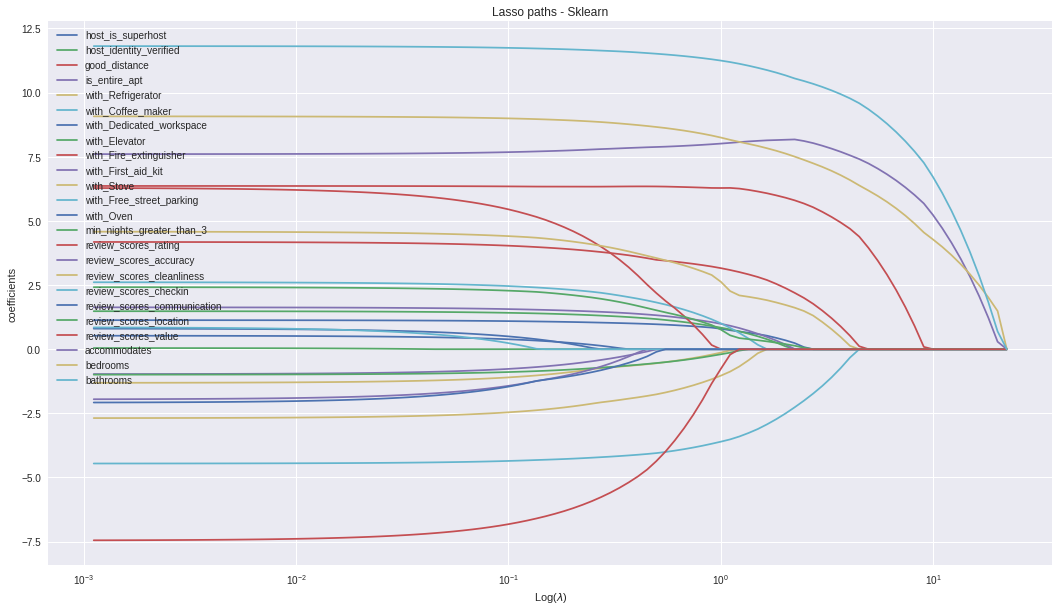

In [ ]:
# Display results
plt.figure(figsize = (18,10))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = selected[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

We can remove then: instant_bookable, review_scores_checkin, review_scores_location

In [ ]:
selected2 = selected.copy()
selected2

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Refrigerator',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher',
 'with_First_aid_kit',
 'with_Stove',
 'with_Free_street_parking',
 'with_Oven',
 'min_nights_greater_than_3',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'accommodates',
 'bedrooms',
 'bathrooms']

This is very long list - lets split it into 2 smaller lists:

In [ ]:
selected2_1 = selected2[:len(selected2)//2]
selected2_2 = selected2[len(selected2)//2:]
print(selected2_1)
print(selected2_2)

['host_is_superhost', 'host_identity_verified', 'good_distance', 'is_entire_apt', 'with_Refrigerator', 'with_Coffee_maker', 'with_Dedicated_workspace', 'with_Elevator', 'with_Fire_extinguisher', 'with_First_aid_kit', 'with_Stove', 'with_Free_street_parking']
['with_Oven', 'min_nights_greater_than_3', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'accommodates', 'bedrooms', 'bathrooms']


In [ ]:
selected2_1.remove('with_Stove')
selected2_1.remove('with_Free_street_parking')
selected2_1.remove('with_Refrigerator')
selected2_1.remove('with_First_aid_kit')
selected2_1

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher']

try Lasso again

In [ ]:
X = data_subset.loc[:,selected2_1]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

(0.0003036263902563562,
 16.348296723719585,
 -0.4532702680304172,
 9.51867562863876)

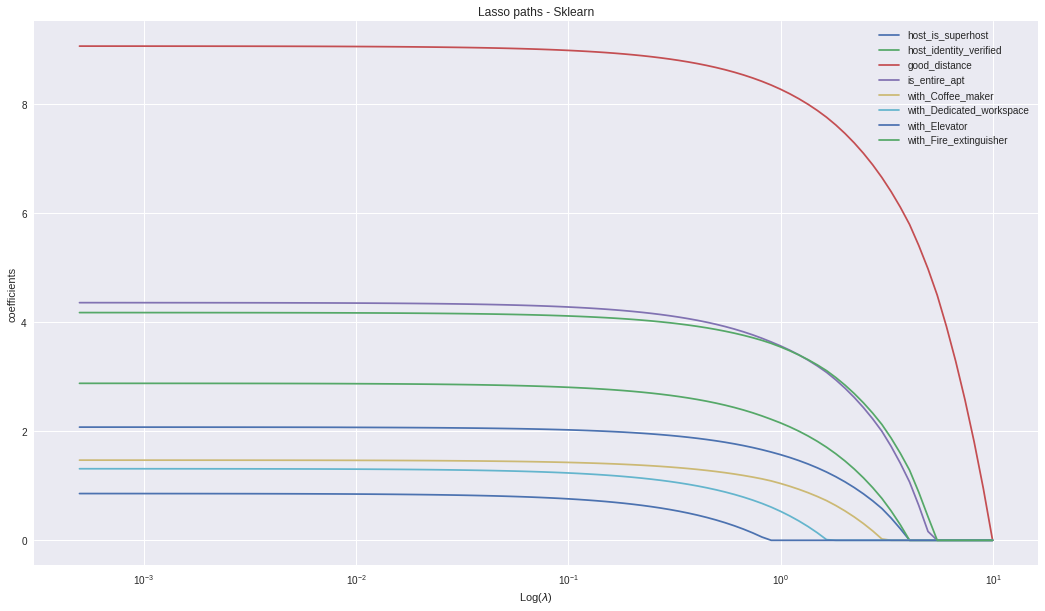

In [ ]:
# Display results
plt.figure(figsize = (18,10))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = selected2_1[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [ ]:
selected2_2.remove('review_scores_value')
selected2_2.remove('review_scores_location')
selected2_2.remove('review_scores_communication')
selected2_2.remove('review_scores_checkin')
selected2_2.remove('review_scores_cleanliness')
selected2_2.remove('review_scores_accuracy')
selected2_2.remove('min_nights_greater_than_3')
selected2_2.remove('with_Oven')
selected2_2

['review_scores_rating', 'accommodates', 'bedrooms', 'bathrooms']

In [ ]:
X = data_subset.loc[:,selected2_2]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

(0.0006793771469297189,
 36.58001920038495,
 -0.6261317371583228,
 13.14876648032478)

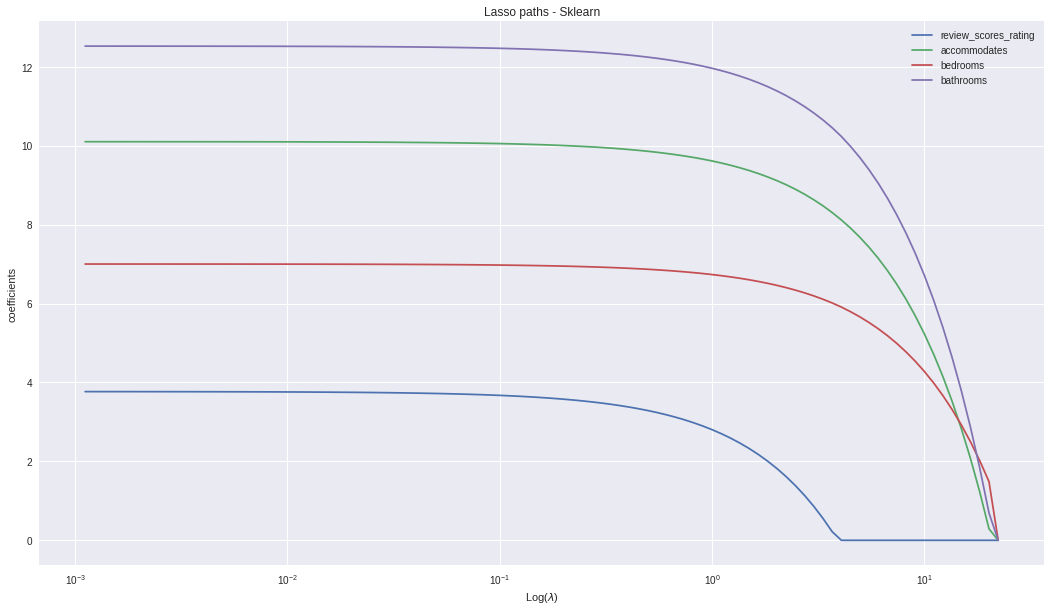

In [ ]:
# Display results
plt.figure(figsize = (18,10))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = selected2_2[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

from those 2 halfs analysed above, we can now again take a look at selected as one:

In [ ]:
selected2 = selected2_1 + selected2_2
selected2

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Coffee_maker',
 'with_Dedicated_workspace',
 'with_Elevator',
 'with_Fire_extinguisher',
 'review_scores_rating',
 'accommodates',
 'bedrooms',
 'bathrooms']

lets remove those attributes, which have negative influence for merged list

In [ ]:
selected2.remove('with_Coffee_maker')
selected2.remove('with_Dedicated_workspace')
selected2.remove('with_Elevator')
selected2

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Fire_extinguisher',
 'review_scores_rating',
 'accommodates',
 'bedrooms',
 'bathrooms']

In [ ]:
X = data_subset.loc[:,selected2]
X = preprocessing.scale(X)
y = np.array(data_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

(0.0006793771469297189,
 36.58001920038495,
 -0.595104880048896,
 12.497202481026815)

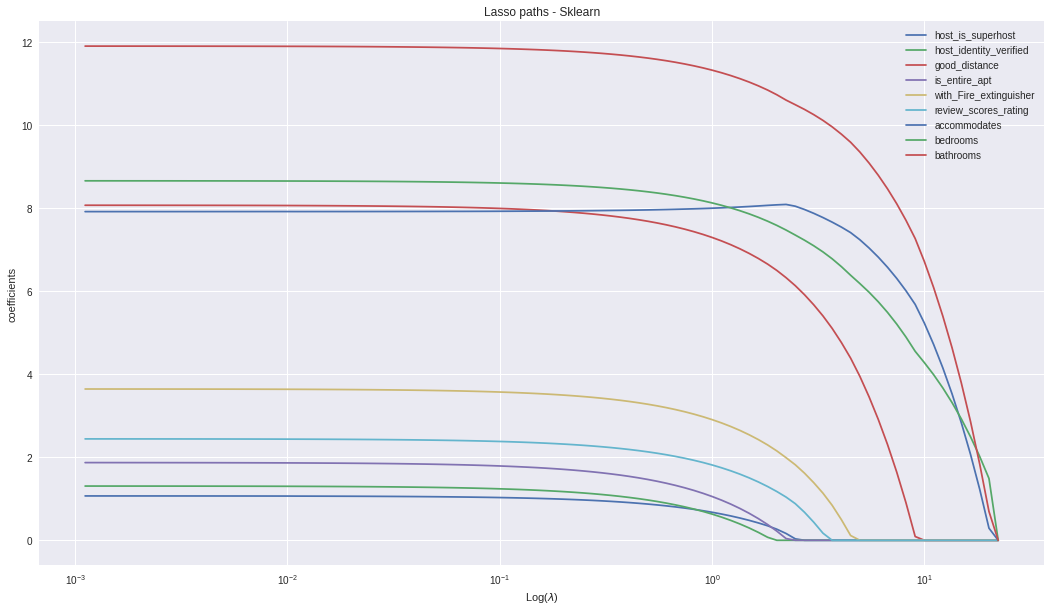

In [ ]:
# Display results
plt.figure(figsize = (18,10))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = selected2[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

Now its much better. At the end lets remove accomodates value, sice it is srtrongly connected with bedrooms

In [ ]:
selected2_no_accomodates = selected2.copy()
selected2_no_accomodates.remove('accommodates')
selected2_no_accomodates

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Fire_extinguisher',
 'review_scores_rating',
 'bedrooms',
 'bathrooms']

In [ ]:
# It will work better in the future, when it is rearanged:
selected2_no_accomodates = ['bedrooms', 'host_is_superhost', 'host_identity_verified', 'good_distance', 'is_entire_apt', 'with_Fire_extinguisher', 'review_scores_rating', 'bathrooms']

#XGB Repeated

In [ ]:
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
scaledFeatures2 = sc2.fit_transform(data[selected2])
scaledFeatures2

array([[ 1.27063513,  0.58144178, -1.36454089, ...,  2.20016185,
         2.01668633,  1.72488956],
       [ 1.27063513,  0.58144178, -1.36454089, ...,  0.12697264,
        -0.62600535, -0.40894677],
       [ 1.27063513,  0.58144178, -1.36454089, ..., -0.90962197,
                nan, -0.40894677],
       ...,
       [-0.78700799,  0.58144178, -1.36454089, ...,  1.16356724,
         2.01668633, -0.40894677],
       [-0.78700799, -1.71986265,  0.73284722, ...,  0.12697264,
        -0.62600535, -0.40894677],
       [-0.78700799,  0.58144178,  0.73284722, ..., -0.90962197,
                nan, -0.40894677]])

In [ ]:
# Load packages and create test set
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

X2 = scaledFeatures2
y = data["price"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize XGBoost classifier and find the best parameter sets with Grid Search CV
xgb_clf2 = xgb.XGBRegressor()
parameters = {'n_estimators': [60, 80, 100, 120], 'max_depth':[3,5,7,9]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

[14:06:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 5, 'n_estimators': 80}


In [ ]:
# Xgb with best parameters
xgb_clf2 = xgb.XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'])
xgb_clf2.fit(X_train2, y_train2)
y_test_pred2 = xgb_clf2.predict(X_test2)
print("R^2 score is: {0: .4f}".format(r2_score(y_test2, y_test_pred2)))
print("RMSE is: {0: .4f}".format(np.sqrt(mean_squared_error(y_test2, y_test_pred2))))

[14:07:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 score is:  0.4173
RMSE is:  38.3492


Last try - without accomodates

In [ ]:
from sklearn.preprocessing import StandardScaler
sc2_no_accomodates = StandardScaler()
scaledFeatures2_no_accomodates = sc.fit_transform(data[selected2_no_accomodates])
scaledFeatures2_no_accomodates

array([[ 2.01668633,  1.27063513,  0.58144178, ..., -1.09570212,
         0.08245417,  1.72488956],
       [-0.62600535,  1.27063513,  0.58144178, ..., -1.09570212,
         0.22188596, -0.40894677],
       [        nan,  1.27063513,  0.58144178, ..., -1.09570212,
         0.22188596, -0.40894677],
       ...,
       [ 2.01668633, -0.78700799,  0.58144178, ..., -1.09570212,
                nan, -0.40894677],
       [-0.62600535, -0.78700799, -1.71986265, ..., -1.09570212,
                nan, -0.40894677],
       [        nan, -0.78700799,  0.58144178, ..., -1.09570212,
                nan, -0.40894677]])

In [ ]:
# Load packages and create test set
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

X2_no_accomodates = scaledFeatures2_no_accomodates
y = data["price"]
X_train2_no_accomodates, X_test2_no_accomodates, y_train2_no_accomodates, y_test2_no_accomodates = train_test_split(X2_no_accomodates, y, test_size=0.2, random_state=42)

In [ ]:
#Initialize XGBoost classifier and find the best parameter sets with Grid Search CV
xgb_clf2_no_accomodates = xgb.XGBRegressor()
parameters = {'n_estimators': [80, 100, 120, 140], 'max_depth':[3,5,7,9]}
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train2_no_accomodates, y_train2_no_accomodates)
print(grid_search.best_params_)

[14:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'max_depth': 5, 'n_estimators': 80}


In [ ]:
# Xgb with best parameters
xgb_clf2_no_accomodates = xgb.XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'])
xgb_clf2_no_accomodates.fit(X_train2_no_accomodates, y_train2_no_accomodates)
y_test_pred2_no_accomodates = xgb_clf2_no_accomodates.predict(X_test2_no_accomodates)
print("R^2 score is: {0: .4f}".format(r2_score(y_test2_no_accomodates, y_test_pred2_no_accomodates)))
print("RMSE is: {0: .4f}".format(np.sqrt(mean_squared_error(y_test2_no_accomodates, y_test_pred2_no_accomodates))))

[15:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 score is:  0.3944
RMSE is:  40.0499


We will use this set of data for further predictions

#Shapley

In [ ]:
explainer = shap.TreeExplainer(xgb_clf)
X = data[selected]
shap_values = explainer.shap_values(X)
X.iloc[0,:]

host_is_superhost             0.00
host_identity_verified        1.00
good_distance                 1.00
is_entire_apt                 0.00
with_Hot_water                1.00
with_Dishes_and_silverware    0.00
with_Shampoo                  1.00
with_Cooking_basics           0.00
with_Refrigerator             0.00
with_Coffee_maker             0.00
with_Bed_linens               1.00
with_Elevator                 0.00
with_Stove                    0.00
with_Smoke_alarm              1.00
with_Oven                     0.00
min_nights_greater_than_3     0.00
review_scores_rating          4.71
review_scores_accuracy        4.86
review_scores_cleanliness     4.93
review_scores_location        4.71
accommodates                  3.00
bedrooms                      1.00
instant_bookable              0.00
Name: 0, dtype: float64

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
explainer2 = shap.TreeExplainer(xgb_clf2)
X2 = data[selected2]
shap_values2 = explainer2.shap_values(X2)
X2.iloc[0,:]

host_is_superhost         0.00
good_distance             1.00
is_entire_apt             0.00
with_Shampoo              1.00
with_Elevator             0.00
with_Smoke_alarm          1.00
review_scores_location    4.71
accommodates              3.00
bedrooms                  1.00
Name: 0, dtype: float64

In [ ]:
shap.initjs()
shap.force_plot(explainer2.expected_value, shap_values2[0,:], X2.iloc[0,:])

In [ ]:
explainer2_no_accomodates = shap.TreeExplainer(xgb_clf2_no_accomodates)
X2_no_accomodates = data[selected2_no_accomodates]
shap_values2_no_accomodates = explainer2_no_accomodates.shap_values(X2_no_accomodates)
X2_no_accomodates.iloc[0,:]

bedrooms                  1.00
host_is_superhost         0.00
good_distance             1.00
is_entire_apt             0.00
with_Shampoo              1.00
with_Elevator             0.00
with_Smoke_alarm          1.00
review_scores_location    4.71
Name: 0, dtype: float64

In [ ]:
shap.initjs()
shap.force_plot(explainer2_no_accomodates.expected_value, shap_values2_no_accomodates[0,:], X2_no_accomodates.iloc[0,:])

#Linear Regression

In [ ]:
selected

['host_is_superhost',
 'host_identity_verified',
 'good_distance',
 'is_entire_apt',
 'with_Hot_water',
 'with_Dishes_and_silverware',
 'with_Shampoo',
 'with_Cooking_basics',
 'with_Refrigerator',
 'with_Coffee_maker',
 'with_Bed_linens',
 'with_Elevator',
 'with_Stove',
 'with_Smoke_alarm',
 'with_Oven',
 'min_nights_greater_than_3',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_location',
 'accommodates',
 'bedrooms',
 'instant_bookable']

In [ ]:
selected2

['host_is_superhost',
 'good_distance',
 'is_entire_apt',
 'with_Shampoo',
 'with_Elevator',
 'with_Smoke_alarm',
 'review_scores_location',
 'accommodates',
 'bedrooms']

In [ ]:
selected2_no_accomodates

['bedrooms',
 'host_is_superhost',
 'good_distance',
 'is_entire_apt',
 'with_Shampoo',
 'with_Elevator',
 'with_Smoke_alarm',
 'review_scores_location']

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ host_is_superhost + host_identity_verified + good_distance +is_entire_apt + with_Hot_water + with_Dishes_and_silverware + with_Shampoo + with_Cooking_basics + with_Refrigerator + with_Coffee_maker + with_Bed_linens + with_Elevator + with_Stove + with_Smoke_alarm + with_Oven + min_nights_greater_than_3 + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_location + accommodates + bedrooms + instant_bookable', data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     212.6
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:13:06   Log-Likelihood:                -41194.
No. Observations:                8057   AIC:                         8.244e+04
Df Residuals:                    8033   BIC:                         8.260e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
model2 = smf.ols('price ~ host_is_superhost + good_distance + is_entire_apt + with_Shampoo + with_Elevator + with_Smoke_alarm + review_scores_location + accommodates + bedrooms', data=data).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     517.0
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:13:06   Log-Likelihood:                -41271.
No. Observations:                8057   AIC:                         8.256e+04
Df Residuals:                    8047   BIC:                         8.263e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -58

In [ ]:
model2_no_accomodates = smf.ols('price ~ host_is_superhost + good_distance + is_entire_apt + with_Shampoo + with_Elevator + with_Smoke_alarm + review_scores_location + bedrooms', data=data).fit()

print(model2_no_accomodates.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     353.2
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:13:06   Log-Likelihood:                -41897.
No. Observations:                8057   AIC:                         8.381e+04
Df Residuals:                    8048   BIC:                         8.387e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -38

W can see, that we can remoove Washer, due to low p

In [ ]:
model_final = smf.ols('price ~ host_is_superhost + good_distance + is_entire_apt + with_Shampoo + with_Elevator + with_Smoke_alarm + review_scores_location + bedrooms', data=data).fit()

print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     353.2
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:13:06   Log-Likelihood:                -41897.
No. Observations:                8057   AIC:                         8.381e+04
Df Residuals:                    8048   BIC:                         8.387e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -38

#Ceteris paribus

Lets calculate number of bedrooms

In [ ]:
['good_distance', 'is_entire_apt', 'with_Hair_dryer', 'with_Shampoo', 'review_scores_cleanliness']
data_temp = pd.DataFrame({"bedrooms" : [x for x in range(30)]})
data_temp['host_is_superhost'] = 1
data_temp['good_distance'] = 1
data_temp['is_entire_apt'] = 1
data_temp['with_Shampoo'] = 1
data_temp['with_Elevator'] = 1
data_temp['with_Smoke_alarm'] = 1
data_temp['review_scores_location'] = 4.8

data_temp

data_temp.head()

bedrooms  host_is_superhost  good_distance  is_entire_apt  with_Shampoo  \
0         0                  1              1              1             1   
1         1                  1              1              1             1   
2         2                  1              1              1             1   
3         3                  1              1              1             1   
4         4                  1              1              1             1   

   with_Elevator  with_Smoke_alarm  review_scores_location  
0              1                 1                     4.8  
1              1                 1                     4.8  
2              1                 1                     4.8  
3              1                 1                     4.8  
4              1                 1                     4.8

In [ ]:
#To jest potrzebne, bo ten xgb zmienia nazwy atrybutów na f0, f1... Tutaj się do tego odwołujemy i zmieniamy mu nazwy spowrotem na prawidłowe
xgb_clf2_no_accomodates.get_booster().feature_names = ['bedrooms', 'host_is_superhost', 'good_distance', 'is_entire_apt', 'with_Shampoo', 'with_Elevator', 'with_Smoke_alarm', 'review_scores_location']
xgb_clf2_no_accomodates.get_booster().feature_names

['bedrooms',
 'host_is_superhost',
 'good_distance',
 'is_entire_apt',
 'with_Shampoo',
 'with_Elevator',
 'with_Smoke_alarm',
 'review_scores_location']

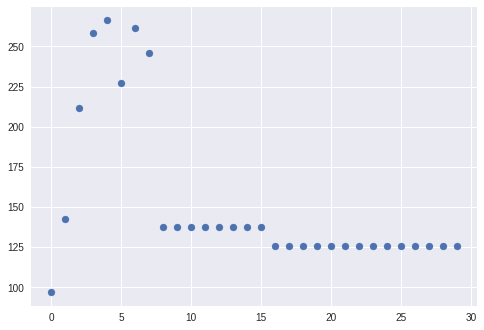

In [ ]:
data_subset = data.loc[:, selected2_no_accomodates + ['price']]
data_subset.dropna(inplace=True)
data_subset = data_subset.iloc[:1000,:]
data_temp = data_temp.reindex(columns=data_subset.columns)
data_temp.drop('price', axis=1, inplace=True)

#Predict
predictions_temp = xgb_clf2_no_accomodates.predict(data_temp)

#Plot
plt.scatter(x=data_temp.bedrooms, y=predictions_temp)
plt.show()

As usual - 2 and 3 bedrooms are quite good